<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>
    
Excellent job, thank you so much! My new comments have digit 3. 
    
    
I do not have any questions, so I can accept the project now. 
    
    
If you are interested in this topic, please take a look at the small [Time Series Course](https://www.kaggle.com/learn/time-series) on Kaggle. There are just several lessons there, and in the end of this course you will apply your knowledge on the sales dataset that is provided for the ongoing [Store Sales Time Series Forecasting Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting) with no rewards except for knowledge :) You can use their dataset for your practice and you can submit your notebook to run the model on the hidden test subset.     
    
    
Congratulations and good luck! 
    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>
    
Thank you for the updates! My new comments have digit 2. Would you please take a look? 
    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Alphonso! I am a reviewer on this project. Congratulations on submitting time series project! 🎉
    

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
   
    
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You did a fantastic job here, and I hope you enjoyed this topic. You have successfully trained several models and analyzed time series, which is great! However, there're a couple of issues that need your attention. Would you take a look at my comments? 
    

<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 


</div>

# Sprint 13 Project: Taxi Order Predictions

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

### Stages:
1. Data Preprocessing: Clean and organize the data, ensuring it's ready for analysis.
2. Exploratory Data Analysis (EDA): Perform an initial analysis to understand the data distribution and identify key trends.
3. ID Target/Feature Variables: Find out exactly what variable is being tested.
4. Split Dataset: Split dataset up into training, validating & test sets..
5. Determine Best Model: Train, fine tune, & evaluate the appropriate models for the task.

## Project instructions
---
1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description
---
The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Looks good! 
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Don't forget about project title :) 

</div>

## Preparation
---

### Import Libraries

In [1]:
import time
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, TimeSeriesSplit
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.utils import resample
from scipy.stats import randint, uniform

### Load in Dataset

In [2]:
taxi_df = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])
taxi_df.set_index('datetime', inplace=True)
taxi_df.sort_index(inplace=True)
taxi_df.index.is_monotonic # datetime column is in chronological order

True

In [3]:
taxi_df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


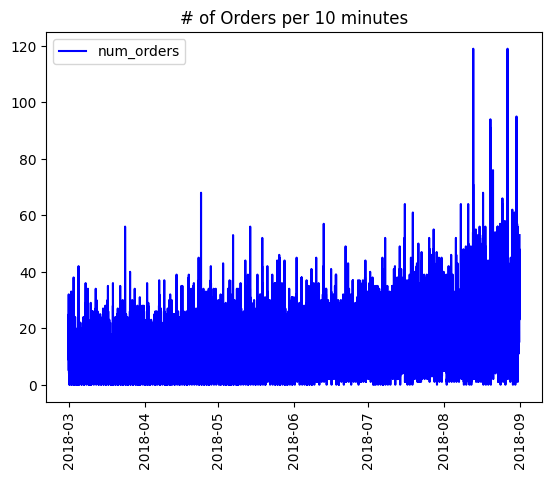

In [4]:
plt.plot(taxi_df, color="blue", label="num_orders")
plt.title("# of Orders per 10 minutes")
plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

Based on the graph, it seems the overall trend is increasing as time progresses. However, it looks like the bottom portion seems to be crowded out, which may due to each observation being taken 10 minutes apart.

### Null Check

In [5]:
taxi_df.isna().sum()

num_orders    0
dtype: int64

### Duplicates Check

In [6]:
taxi_df.duplicated().sum()

26415

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- Each chart must have a title at least. Would you add it here and further? 


- Please don't forget about conclusions as well. </div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Well done! 
</div>

### Resampling time series from 10 minute interval to 1 hour interval

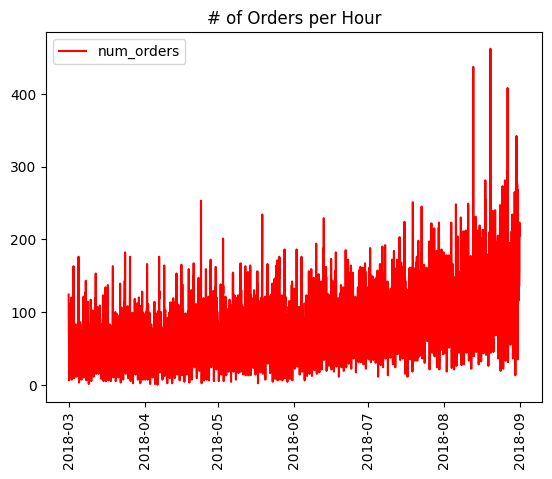

In [7]:
taxi_df = taxi_df.resample('1H').sum()
plt.plot(taxi_df, color="red", label="num_orders")
plt.title("# of Orders per Hour")
plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

After resampling, it seems that the original graph has just been zoomed out. My intuition leads me to believe that no transformation of values have taken place, just how each value within the dataset have been arranged.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Resampling is correct! 
    
</div>

## Analysis
---

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
We should check it before we use resampling.     
</div>

### Descriptive statistics for the 'num_order' column

In [8]:
taxi_df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Looking at the statistics of the 'num_orders' column, it seems that the average order per hour within the time frame is approximately 84. The max number of orders received in a hour is 462, while the min number is 0.

### Time series decomposition

In [9]:
decomposed_taxi = seasonal_decompose(taxi_df)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
`seasonal_decompose` is a great method, well done! 
    
</div>

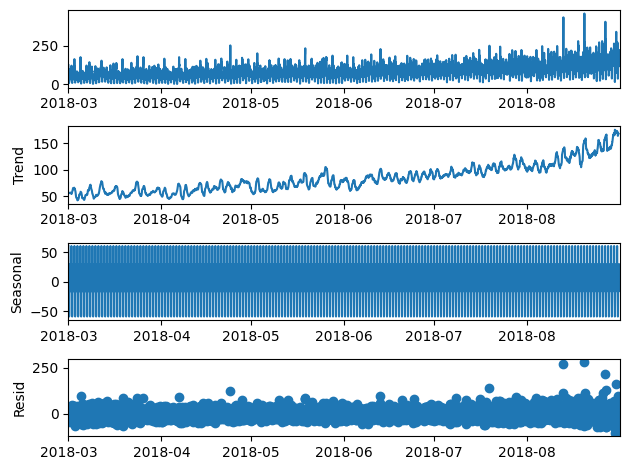

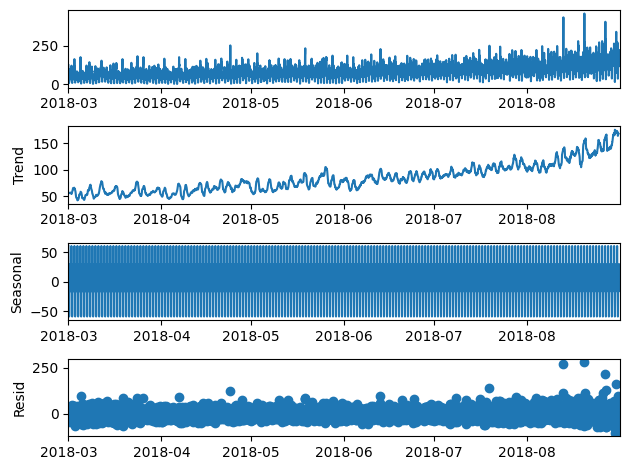

In [10]:
decomposed_taxi.plot()

<AxesSubplot:xlabel='datetime'>

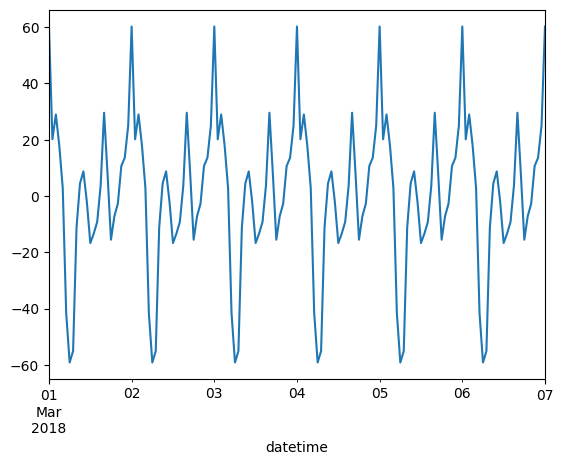

In [11]:
decomposed_taxi.seasonal['2018-03-01 00:00:00':'2018-03-07 00:00:00'].plot()

A slice of the dataset was taken to show a more in-depth depiction of the seasonality. The main pattern or cycle seems to be on a day to day basis.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Yes, we may have an intraday seasonality, which makes sense in such dataset.    
</div>

### Rolling mean

In [12]:
taxi_df['rolling_mean'] = taxi_df['num_orders'].shift().rolling(24).mean() # i set the window size to 24 to observe the hourly data on a day to day basis

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>


If this feature will be used in training the models, don't forget to shift data. 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
The data must be shifted before we calculate the rolling mean. The `mean_shifted` should be excluded, since these two columns will have high correlation coefficients. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Correct! 

</div>

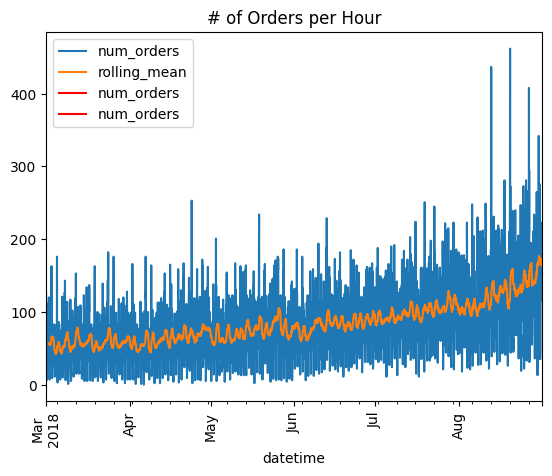

In [13]:
taxi_df.plot()
plt.plot(taxi_df, color="red", label="num_orders")
plt.title("# of Orders per Hour")
plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

From looking at the graph above, the data that's being worked with seems to be nonstationary given that the averge value increases.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good. </div>

### Test for stationary

In [14]:
# Null: time series is nonstationary
# Alt: time series is stationary

taxi_stationarityTest = adfuller(taxi_df['num_orders'])
sig_level = 0.05
print('p-value: ', taxi_stationarityTest[1])

if taxi_stationarityTest[1] < sig_level:
    print(
        "Reject null hypothesis: time series is likely stationary"
    )
else:
    print(
        "Failed to reject null hypothesis: time series is likely nonstationary"
    )

p-value:  0.028940051402613028
Reject null hypothesis: time series is likely stationary


As a more robust method for checking statioary, the Dickey-Fuller test was conducted & it seems that the dataset is in fact stationary.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>


Good! 

</div>

## Training

### Feature Prep

In [15]:
# feature engineering
def make_features(data, max_lag):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct. Sometimes we can notice autocorrelation in time series. It means that the current value of the series depends on the previous values. Including so-called lag components allows machine learning models, such as linear regression, to take this dependency into account.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
However, will year be helpful given we have only one year in the data? :) This feature will not provide any useful information for the model and can lead to redundancy and increased computation time. The same can be said about month, so you can exclude them.

</div>

In [16]:
make_features(taxi_df, 24)

For the hourly time series dataset, 24 lagged features were created as it would capture the daily pattern or cycle in the data. Which is useful for the daily periodic behaviors within a 24-hour period.

In [17]:
print(taxi_df.isna().sum())
taxi_df = taxi_df.dropna()
taxi_df.head(10)

num_orders       0
rolling_mean    24
year             0
month            0
day              0
dayofweek        0
lag_1            1
lag_2            2
lag_3            3
lag_4            4
lag_5            5
lag_6            6
lag_7            7
lag_8            8
lag_9            9
lag_10          10
lag_11          11
lag_12          12
lag_13          13
lag_14          14
lag_15          15
lag_16          16
lag_17          17
lag_18          18
lag_19          19
lag_20          20
lag_21          21
lag_22          22
lag_23          23
lag_24          24
dtype: int64


,num_orders,rolling_mean,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,56.833333,2018,3,2,4,58.0,113.0,66.0,61.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0
2018-03-02 01:00:00,120,55.416667,2018,3,2,4,90.0,58.0,113.0,66.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0
2018-03-02 02:00:00,75,56.875000,2018,3,2,4,120.0,90.0,58.0,113.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0
2018-03-02 03:00:00,64,57.041667,2018,3,2,4,75.0,120.0,90.0,58.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0
2018-03-02 04:00:00,20,56.958333,2018,3,2,4,64.0,75.0,120.0,90.0,...,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0
2018-03-02 05:00:00,11,56.000000,2018,3,2,4,20.0,64.0,75.0,120.0,...,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0
2018-03-02 06:00:00,11,56.208333,2018,3,2,4,11.0,20.0,64.0,75.0,...,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0
2018-03-02 07:00:00,7,56.166667,2018,3,2,4,11.0,11.0,20.0,64.0,...,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0
2018-03-02 08:00:00,46,55.833333,2018,3,2,4,7.0,11.0,11.0,20.0,...,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good. 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
There are no categorical columns here, so let's not use ohe, introducing extra 37 features, which significantly deacreases training time without improving models' accuracy. 
</div>

### Split data into training, validation, & test sets

In [18]:
# Split data into training, validation, & test sets
y = taxi_df['num_orders'] # target
x = taxi_df.drop(columns =['num_orders'], axis=1) #features

x_train, x_rem, y_train, y_rem = train_test_split(x, y, shuffle=False, test_size=0.20)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, shuffle=False, test_size=0.50)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Student's comment </h2>
    
Below, the function for model training contains a splitting property. Here the same original data is being split outside of that function, so that the model tuning has access to those training variables.
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Student's comment 2 </h2>
    
I accidently replaced your comment regarding the code duplication & declaring the x, y, xtrain & ytrain variables once.
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
No worries 😊
</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good. 
    
</div>

### Feature Correlation Check

In [19]:
taxi_df.corr()

,num_orders,rolling_mean,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
num_orders,1.000000,0.553520,NaN,0.509279,0.161285,-0.019680,0.623635,0.464652,0.320341,0.247929,...,0.237354,0.274209,0.257994,0.212323,0.198838,0.219859,0.267209,0.406704,0.557188,0.691576
rolling_mean,0.553520,1.000000,NaN,0.861566,0.274231,-0.025997,0.574792,0.578336,0.582082,0.585526,...,0.593709,0.591108,0.590261,0.589632,0.588726,0.585425,0.584032,0.579102,0.574243,0.568013
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.509279,0.861566,NaN,1.000000,-0.008068,-0.012055,0.509298,0.508686,0.508590,0.508227,...,0.504778,0.504450,0.504289,0.504247,0.504119,0.504236,0.504681,0.504629,0.504511,0.504805
day,0.161285,0.274231,NaN,-0.008068,1.000000,-0.013959,0.161340,0.160894,0.160565,0.160767,...,0.161661,0.161177,0.161399,0.161324,0.161049,0.158818,0.158236,0.158382,0.157528,0.156231
dayofweek,-0.019680,-0.025997,NaN,-0.012055,-0.013959,1.000000,-0.027398,-0.029637,-0.029124,-0.028762,...,-0.007924,-0.005012,-0.002613,-0.000618,-0.001593,0.000121,0.000522,0.011791,0.021076,0.030720
lag_1,0.623635,0.574792,NaN,0.509298,0.161340,-0.027398,1.000000,0.622802,0.464194,0.319795,...,0.258366,0.236451,0.275097,0.259039,0.212732,0.196972,0.219879,0.265786,0.405796,0.555999
lag_2,0.464652,0.578336,NaN,0.508686,0.160894,-0.029637,0.622802,1.000000,0.622407,0.463626,...,0.311370,0.257041,0.237026,0.275875,0.259062,0.210322,0.196882,0.218036,0.264518,0.404142
lag_3,0.320341,0.582082,NaN,0.508590,0.160565,-0.029124,0.464194,0.622407,1.000000,0.622205,...,0.329743,0.310866,0.257534,0.237624,0.276076,0.258145,0.210295,0.195970,0.217318,0.263419
lag_4,0.247929,0.585526,NaN,0.508227,0.160767,-0.028762,0.319795,0.463626,0.622205,1.000000,...,0.314826,0.329318,0.311367,0.258134,0.237855,0.275308,0.258136,0.209482,0.195282,0.216184


Looking at the correlation presented above, it seems that the features: 'mean', 'mean_shifted', & 'month', have a high level of correlation between each other (multicollinearity). Every other feature, mainly the lagged features hold a positive relationship with the target variable. 

Due to trying to capture long term trends & patterns, I would keep these features unless they negatively impact model performance.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Good. 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
As you see, year can be dropped. 
    
</div>


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
>  it seems that the features: 'mean', 'mean_shifted', & 'month', have a high level of correlation between each other 
    
   
So are we going to do anything with that given linear regression (linear model) is used below? Please exclude the `mean_shifted` column and don't forget to shift the data before calculating the rolling mean to avoid data leakage. 
</div>


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Would you add a conclusion? :)     
</div>

### LR Model

In [20]:
def train_pred_eval(model, x, y, cv_splits=5, **kwargs):
    # Initialize the model with optional hyperparameters
    model_instance = model(**kwargs)
    
    # Define Time Series Cross-Validator
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    
    # Cross-Validation
    cv_mse_scores = cross_val_score(model_instance, x, y, cv=tscv, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_mse_scores)
    print("Cross-Validation RMSE Scores:", cv_rmse_scores)
    print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
    print("Standard Deviation of Cross-Validation RMSE:", cv_rmse_scores.std())

    # Split data into training and validation sets
    train_x, x_rem, train_y, y_rem = train_test_split(x, y, test_size=0.40, random_state=42)
    valid_x, test_x, valid_y, test_y = train_test_split(x_rem, y_rem, test_size=0.50, random_state=42)

    # Train the model on the entire training set and measure the training time
    start_time = time.time()
    model_instance.fit(train_x, train_y)
    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")
    
    # Validate the model and measure the prediction time
    start_time = time.time()
    pred_y_val = model_instance.predict(valid_x)
    validation_time = time.time() - start_time
    print(f"Validation prediction time: {validation_time} seconds")
    
    # Calculate RMSE for validation
    rmse_val = mean_squared_error(valid_y, pred_y_val, squared=False)
    print(f"Validation RMSE: {rmse_val}")
    
    # Test the model and measure the prediction time
    start_time = time.time()
    pred_y_test = model_instance.predict(test_x)
    test_prediction_time = time.time() - start_time
    print(f"Test prediction time: {test_prediction_time} seconds")
    
    # Calculate RMSE for test
    rmse_test = mean_squared_error(test_y, pred_y_test, squared=False)
    print(f"Test RMSE: {rmse_test}")

    return {
        'training_time': training_time,
        'validation_time': validation_time,
        'validation_rmse': rmse_val,
        'test_prediction_time': test_prediction_time,
        'test_rmse': rmse_test,
        'cv_rmse_scores': cv_rmse_scores,
        'mean_cv_rmse': cv_rmse_scores.mean(),
        'std_cv_rmse': cv_rmse_scores.std()
    }



<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Why do we need to split the data for the second time?     
</div>

- Note that the time series cross validation method was used instead of the normal K-fold method due to trying to abide to the temporal order of the dataset.

In [21]:
results_lr = train_pred_eval(LinearRegression, x, y, cv_splits=5)

Cross-Validation RMSE Scores: [26.39187903 25.33743453 25.38318334 30.10629278 42.02315207]
Mean Cross-Validation RMSE: 29.84838835073282
Standard Deviation of Cross-Validation RMSE: 6.332860384939821
Training time: 0.07921028137207031 seconds
Validation prediction time: 0.0015151500701904297 seconds
Validation RMSE: 29.123354500605735
Test prediction time: 0.0013720989227294922 seconds
Test RMSE: 27.603422657455916


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Looks correct! 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
There may be data leakage, so please don't forget to check RMSE above after you fix the issues. RMSE is too low.
</div>

### RF Model

In [22]:
train_pred_eval(RandomForestRegressor, x, y, cv_splits=5, random_state=42)

Cross-Validation RMSE Scores: [22.58847114 23.34270169 24.59978162 29.99786817 41.99812219]
Mean Cross-Validation RMSE: 28.505388962001682
Standard Deviation of Cross-Validation RMSE: 7.22770183674171
Training time: 2.809783935546875 seconds
Validation prediction time: 0.018139362335205078 seconds
Validation RMSE: 26.947267371529726
Test prediction time: 0.016963481903076172 seconds
Test RMSE: 25.44872224341579


{'training_time': 2.809783935546875,
 'validation_time': 0.018139362335205078,
 'validation_rmse': 26.947267371529726,
 'test_prediction_time': 0.016963481903076172,
 'test_rmse': 25.44872224341579,
 'cv_rmse_scores': array([22.58847114, 23.34270169, 24.59978162, 29.99786817, 41.99812219]),
 'mean_cv_rmse': 28.505388962001682,
 'std_cv_rmse': 7.22770183674171}

In [23]:
# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42, warm_start=True)

# Define the parameter distribution using scipy's randint for random sampling
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5)
}

# Setup Time Series Split 
tscv = TimeSeriesSplit(n_splits=5)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of iterations
    cv=tscv,  # Number of cross-validation folds
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Assuming x_train and y_train are already defined
# Fit the model
rf_random_search.fit(x_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Best Score: {rf_random_search.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time=   1.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   1.5s
[CV] END max_depth=20, min_samples_lea

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=93; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=93; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=93; total time=   1.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=93; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=84; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=84; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=84; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=84; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=84; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=99; total tim

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You have successfully implemented hyperparameters tuning, well done! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
I would try more values. 
</div>

### Tuned RF Model

In [35]:
rf_best_params = rf_random_search.best_params_
results_rf = train_pred_eval(RandomForestRegressor, x, y, cv_splits=5, max_depth=rf_best_params['max_depth'], min_samples_leaf=rf_best_params['min_samples_leaf'], min_samples_split=rf_best_params['min_samples_split'],
                n_estimators=rf_best_params['n_estimators'], random_state=42)

Cross-Validation RMSE Scores: [22.61825158 23.41101463 24.64297692 30.15468679 42.37587066]
Mean Cross-Validation RMSE: 28.640560114987682
Standard Deviation of Cross-Validation RMSE: 7.355927579895555
Training time: 3.589207410812378 seconds
Validation prediction time: 0.0189056396484375 seconds
Validation RMSE: 26.93504613586542
Test prediction time: 0.01770186424255371 seconds
Test RMSE: 25.27589583460511


### Initial LightGBM Model

In [25]:
train_pred_eval(lgb.LGBMRegressor, x, y, cv_splits=5, objective= 'regression', metric= 'rmse', boosting_type= 'gbdt', random_state=42)

Cross-Validation RMSE Scores: [23.78874644 23.8576977  24.6222526  30.174244   42.57122927]
Mean Cross-Validation RMSE: 29.0028340036013
Standard Deviation of Cross-Validation RMSE: 7.187797738502183
Training time: 0.39449405670166016 seconds
Validation prediction time: 0.003506898880004883 seconds
Validation RMSE: 26.242297008129107
Test prediction time: 0.0035703182220458984 seconds
Test RMSE: 25.068058932265117


{'training_time': 0.39449405670166016,
 'validation_time': 0.003506898880004883,
 'validation_rmse': 26.242297008129107,
 'test_prediction_time': 0.0035703182220458984,
 'test_rmse': 25.068058932265117,
 'cv_rmse_scores': array([23.78874644, 23.8576977 , 24.6222526 , 30.174244  , 42.57122927]),
 'mean_cv_rmse': 29.0028340036013,
 'std_cv_rmse': 7.187797738502183}

### Light GBM Hyperparameter Tuning

In [26]:
# Define the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Define the parameter grid
param_grid = {
    'num_leaves': randint(20, 50),
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Set up RandomizedSearchCV
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
lgb_random_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found: ", lgb_random_search.best_params_)
print(f"Best Score: {lgb_random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   0.2s
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   0.4s
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   0.5s
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total

[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   0.3s
[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   0.2s
[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   0.3s
[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   0.3s
[CV] END colsample_bytree=0.9266084230952957, le

[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   0.3s
[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   0.4s
[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   0.5s
[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   0.5s
[CV] END colsample_bytree=0.9139734361668984, learni

[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   0.4s
[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   0.9s
[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   1.2s
[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   1.0s
[CV] END colsample_bytree=0.9109056876685533, le

[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   0.3s
[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   0.5s
[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   0.6s
[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   0.6s
[CV] END colsample_bytree=0.9087353198035246

[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   0.2s
[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   0.3s
[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   0.2s
[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   0.3s
[CV] END colsample_bytree=0.8497580139654256, learning_r

[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   0.2s
[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   0.4s
[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   0.3s
[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   0.3s
[CV] END colsample_bytree=0.8126748857919832, learning_r

[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   0.6s
[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   0.7s
[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   0.7s
[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   0.9s
Best parameters found:  {'colsample_bytree': 0.8

### Tuned Light GBM Model

In [27]:
lgbm_best_params = lgb_random_search.best_params_
results_lgbm =train_pred_eval(lgb.LGBMRegressor, x, y, cv_splits=5, objective= 'regression', metric= 'rmse',
                boosting_type= 'gbdt', colsample_bytree=lgbm_best_params['colsample_bytree'], learning_rate=lgbm_best_params['learning_rate'], max_depth=lgbm_best_params['max_depth'],
                n_estimators=lgbm_best_params['n_estimators'], num_leaves=lgbm_best_params['num_leaves'], reg_alpha=lgbm_best_params['reg_alpha'], reg_lambda=lgbm_best_params['reg_lambda'],
                subsample=lgbm_best_params['subsample'],  random_state=42)

Cross-Validation RMSE Scores: [22.94560394 23.38588711 24.2068737  29.36059614 42.11122222]
Mean Cross-Validation RMSE: 28.402036620547545
Standard Deviation of Cross-Validation RMSE: 7.230413703600545
Training time: 0.9955301284790039 seconds
Validation prediction time: 0.006262540817260742 seconds
Validation RMSE: 25.96440200008596
Test prediction time: 0.005633354187011719 seconds
Test RMSE: 24.58518927925315


### Initial CatBoost Model

In [28]:
train_pred_eval(CatBoostRegressor, x, y, cv_splits=5, random_state=42)

Learning rate set to 0.038974
0:	learn: 29.0054172	total: 49.8ms	remaining: 49.7s
1:	learn: 28.5264026	total: 52.4ms	remaining: 26.2s
2:	learn: 28.0659581	total: 54.8ms	remaining: 18.2s
3:	learn: 27.6025401	total: 57.3ms	remaining: 14.3s
4:	learn: 27.1600437	total: 59.6ms	remaining: 11.9s
5:	learn: 26.7766896	total: 62ms	remaining: 10.3s
6:	learn: 26.4026559	total: 64.3ms	remaining: 9.12s
7:	learn: 26.0043951	total: 66.7ms	remaining: 8.27s
8:	learn: 25.6038613	total: 69.1ms	remaining: 7.61s
9:	learn: 25.2966162	total: 71.4ms	remaining: 7.07s
10:	learn: 24.9738994	total: 73.8ms	remaining: 6.64s
11:	learn: 24.6610482	total: 76.2ms	remaining: 6.28s
12:	learn: 24.3779712	total: 78.6ms	remaining: 5.97s
13:	learn: 24.1095418	total: 81.1ms	remaining: 5.71s
14:	learn: 23.8127544	total: 83.5ms	remaining: 5.48s
15:	learn: 23.5711895	total: 85.8ms	remaining: 5.28s
16:	learn: 23.3266412	total: 88.2ms	remaining: 5.1s
17:	learn: 23.0341405	total: 90.6ms	remaining: 4.94s
18:	learn: 22.8035698	total: 

165:	learn: 13.4341045	total: 450ms	remaining: 2.26s
166:	learn: 13.3983955	total: 452ms	remaining: 2.25s
167:	learn: 13.3594889	total: 455ms	remaining: 2.25s
168:	learn: 13.3290465	total: 457ms	remaining: 2.25s
169:	learn: 13.2860626	total: 459ms	remaining: 2.24s
170:	learn: 13.2446205	total: 462ms	remaining: 2.24s
171:	learn: 13.2194803	total: 464ms	remaining: 2.23s
172:	learn: 13.1947236	total: 466ms	remaining: 2.23s
173:	learn: 13.1713945	total: 469ms	remaining: 2.23s
174:	learn: 13.1450472	total: 471ms	remaining: 2.22s
175:	learn: 13.1166282	total: 473ms	remaining: 2.22s
176:	learn: 13.0894139	total: 476ms	remaining: 2.21s
177:	learn: 13.0403242	total: 478ms	remaining: 2.21s
178:	learn: 13.0011122	total: 480ms	remaining: 2.2s
179:	learn: 12.9715022	total: 483ms	remaining: 2.2s
180:	learn: 12.9352041	total: 485ms	remaining: 2.19s
181:	learn: 12.8978680	total: 487ms	remaining: 2.19s
182:	learn: 12.8793865	total: 490ms	remaining: 2.19s
183:	learn: 12.8618771	total: 492ms	remaining: 2

327:	learn: 9.9658925	total: 849ms	remaining: 1.74s
328:	learn: 9.9631652	total: 852ms	remaining: 1.74s
329:	learn: 9.9606316	total: 854ms	remaining: 1.73s
330:	learn: 9.9586909	total: 856ms	remaining: 1.73s
331:	learn: 9.9357388	total: 859ms	remaining: 1.73s
332:	learn: 9.9335113	total: 861ms	remaining: 1.72s
333:	learn: 9.9270359	total: 863ms	remaining: 1.72s
334:	learn: 9.9103832	total: 866ms	remaining: 1.72s
335:	learn: 9.9012406	total: 868ms	remaining: 1.72s
336:	learn: 9.8659485	total: 870ms	remaining: 1.71s
337:	learn: 9.8625648	total: 873ms	remaining: 1.71s
338:	learn: 9.8442692	total: 875ms	remaining: 1.71s
339:	learn: 9.8226389	total: 877ms	remaining: 1.7s
340:	learn: 9.7904056	total: 880ms	remaining: 1.7s
341:	learn: 9.7887426	total: 882ms	remaining: 1.7s
342:	learn: 9.7858654	total: 884ms	remaining: 1.69s
343:	learn: 9.7571694	total: 887ms	remaining: 1.69s
344:	learn: 9.7522130	total: 889ms	remaining: 1.69s
345:	learn: 9.7368130	total: 892ms	remaining: 1.69s
346:	learn: 9.7

492:	learn: 7.4706542	total: 1.25s	remaining: 1.28s
493:	learn: 7.4525010	total: 1.25s	remaining: 1.28s
494:	learn: 7.4331322	total: 1.25s	remaining: 1.28s
495:	learn: 7.4157881	total: 1.26s	remaining: 1.28s
496:	learn: 7.3924966	total: 1.26s	remaining: 1.27s
497:	learn: 7.3675934	total: 1.26s	remaining: 1.27s
498:	learn: 7.3499730	total: 1.26s	remaining: 1.27s
499:	learn: 7.3380299	total: 1.27s	remaining: 1.27s
500:	learn: 7.3165899	total: 1.27s	remaining: 1.26s
501:	learn: 7.3002461	total: 1.27s	remaining: 1.26s
502:	learn: 7.2797015	total: 1.27s	remaining: 1.26s
503:	learn: 7.2700127	total: 1.28s	remaining: 1.26s
504:	learn: 7.2511940	total: 1.28s	remaining: 1.25s
505:	learn: 7.2319665	total: 1.28s	remaining: 1.25s
506:	learn: 7.2305037	total: 1.28s	remaining: 1.25s
507:	learn: 7.2116583	total: 1.28s	remaining: 1.25s
508:	learn: 7.1945552	total: 1.29s	remaining: 1.24s
509:	learn: 7.1812286	total: 1.29s	remaining: 1.24s
510:	learn: 7.1665572	total: 1.29s	remaining: 1.24s
511:	learn: 

654:	learn: 5.4916891	total: 1.65s	remaining: 869ms
655:	learn: 5.4831661	total: 1.65s	remaining: 866ms
656:	learn: 5.4709750	total: 1.65s	remaining: 863ms
657:	learn: 5.4590949	total: 1.66s	remaining: 861ms
658:	learn: 5.4466496	total: 1.66s	remaining: 858ms
659:	learn: 5.4339847	total: 1.66s	remaining: 856ms
660:	learn: 5.4132112	total: 1.66s	remaining: 853ms
661:	learn: 5.4034499	total: 1.67s	remaining: 851ms
662:	learn: 5.3881169	total: 1.67s	remaining: 848ms
663:	learn: 5.3762586	total: 1.67s	remaining: 845ms
664:	learn: 5.3682246	total: 1.67s	remaining: 843ms
665:	learn: 5.3668326	total: 1.68s	remaining: 840ms
666:	learn: 5.3587533	total: 1.68s	remaining: 838ms
667:	learn: 5.3457845	total: 1.68s	remaining: 835ms
668:	learn: 5.3330132	total: 1.68s	remaining: 832ms
669:	learn: 5.3208592	total: 1.68s	remaining: 830ms
670:	learn: 5.3106208	total: 1.69s	remaining: 827ms
671:	learn: 5.2979574	total: 1.69s	remaining: 825ms
672:	learn: 5.2838642	total: 1.69s	remaining: 822ms
673:	learn: 

818:	learn: 4.1692505	total: 2.05s	remaining: 452ms
819:	learn: 4.1597352	total: 2.05s	remaining: 450ms
820:	learn: 4.1460251	total: 2.05s	remaining: 447ms
821:	learn: 4.1362240	total: 2.05s	remaining: 445ms
822:	learn: 4.1356166	total: 2.06s	remaining: 442ms
823:	learn: 4.1349310	total: 2.06s	remaining: 440ms
824:	learn: 4.1322822	total: 2.06s	remaining: 437ms
825:	learn: 4.1214098	total: 2.06s	remaining: 435ms
826:	learn: 4.1126664	total: 2.06s	remaining: 432ms
827:	learn: 4.1077944	total: 2.07s	remaining: 429ms
828:	learn: 4.0976904	total: 2.07s	remaining: 427ms
829:	learn: 4.0928885	total: 2.07s	remaining: 424ms
830:	learn: 4.0857799	total: 2.07s	remaining: 422ms
831:	learn: 4.0775493	total: 2.08s	remaining: 419ms
832:	learn: 4.0647137	total: 2.08s	remaining: 417ms
833:	learn: 4.0551153	total: 2.08s	remaining: 414ms
834:	learn: 4.0483874	total: 2.08s	remaining: 412ms
835:	learn: 4.0429964	total: 2.09s	remaining: 409ms
836:	learn: 4.0366623	total: 2.09s	remaining: 407ms
837:	learn: 

983:	learn: 3.1612598	total: 2.45s	remaining: 39.8ms
984:	learn: 3.1541458	total: 2.45s	remaining: 37.3ms
985:	learn: 3.1468504	total: 2.45s	remaining: 34.8ms
986:	learn: 3.1417431	total: 2.45s	remaining: 32.3ms
987:	learn: 3.1368679	total: 2.46s	remaining: 29.8ms
988:	learn: 3.1322013	total: 2.46s	remaining: 27.3ms
989:	learn: 3.1215587	total: 2.46s	remaining: 24.9ms
990:	learn: 3.1212707	total: 2.46s	remaining: 22.4ms
991:	learn: 3.1151814	total: 2.46s	remaining: 19.9ms
992:	learn: 3.1148378	total: 2.47s	remaining: 17.4ms
993:	learn: 3.1071775	total: 2.47s	remaining: 14.9ms
994:	learn: 3.0998526	total: 2.47s	remaining: 12.4ms
995:	learn: 3.0970803	total: 2.48s	remaining: 9.94ms
996:	learn: 3.0967395	total: 2.48s	remaining: 7.46ms
997:	learn: 3.0910761	total: 2.48s	remaining: 4.97ms
998:	learn: 3.0860386	total: 2.48s	remaining: 2.49ms
999:	learn: 3.0786000	total: 2.49s	remaining: 0us
Learning rate set to 0.043485
0:	learn: 30.2886416	total: 4.97ms	remaining: 4.97s
1:	learn: 29.7015400

149:	learn: 15.5207373	total: 439ms	remaining: 2.49s
150:	learn: 15.4993208	total: 442ms	remaining: 2.48s
151:	learn: 15.4722650	total: 444ms	remaining: 2.48s
152:	learn: 15.4545818	total: 447ms	remaining: 2.47s
153:	learn: 15.4304220	total: 450ms	remaining: 2.47s
154:	learn: 15.4031627	total: 453ms	remaining: 2.47s
155:	learn: 15.3855987	total: 455ms	remaining: 2.46s
156:	learn: 15.3613232	total: 458ms	remaining: 2.46s
157:	learn: 15.3183657	total: 461ms	remaining: 2.46s
158:	learn: 15.3008960	total: 464ms	remaining: 2.45s
159:	learn: 15.2750853	total: 467ms	remaining: 2.45s
160:	learn: 15.2405498	total: 469ms	remaining: 2.45s
161:	learn: 15.2176609	total: 472ms	remaining: 2.44s
162:	learn: 15.1912839	total: 475ms	remaining: 2.44s
163:	learn: 15.1725542	total: 478ms	remaining: 2.44s
164:	learn: 15.1460959	total: 481ms	remaining: 2.43s
165:	learn: 15.1264695	total: 484ms	remaining: 2.43s
166:	learn: 15.0854655	total: 487ms	remaining: 2.43s
167:	learn: 15.0753255	total: 490ms	remaining:

329:	learn: 12.1609015	total: 954ms	remaining: 1.94s
330:	learn: 12.1453135	total: 957ms	remaining: 1.93s
331:	learn: 12.1316056	total: 960ms	remaining: 1.93s
332:	learn: 12.1242657	total: 963ms	remaining: 1.93s
333:	learn: 12.1223590	total: 966ms	remaining: 1.93s
334:	learn: 12.1189527	total: 973ms	remaining: 1.93s
335:	learn: 12.1032617	total: 975ms	remaining: 1.93s
336:	learn: 12.0962578	total: 978ms	remaining: 1.92s
337:	learn: 12.0947048	total: 981ms	remaining: 1.92s
338:	learn: 12.0784190	total: 984ms	remaining: 1.92s
339:	learn: 12.0739154	total: 986ms	remaining: 1.91s
340:	learn: 12.0455170	total: 989ms	remaining: 1.91s
341:	learn: 12.0384286	total: 992ms	remaining: 1.91s
342:	learn: 12.0366612	total: 995ms	remaining: 1.91s
343:	learn: 12.0211973	total: 997ms	remaining: 1.9s
344:	learn: 11.9922146	total: 1s	remaining: 1.9s
345:	learn: 11.9782614	total: 1s	remaining: 1.9s
346:	learn: 11.9557629	total: 1s	remaining: 1.89s
347:	learn: 11.9386020	total: 1.01s	remaining: 1.89s
348:	

498:	learn: 9.8628440	total: 1.44s	remaining: 1.44s
499:	learn: 9.8535295	total: 1.44s	remaining: 1.44s
500:	learn: 9.8452602	total: 1.44s	remaining: 1.44s
501:	learn: 9.8321304	total: 1.45s	remaining: 1.43s
502:	learn: 9.8119695	total: 1.45s	remaining: 1.43s
503:	learn: 9.7977304	total: 1.45s	remaining: 1.43s
504:	learn: 9.7967102	total: 1.45s	remaining: 1.43s
505:	learn: 9.7830719	total: 1.46s	remaining: 1.42s
506:	learn: 9.7820806	total: 1.46s	remaining: 1.42s
507:	learn: 9.7714580	total: 1.47s	remaining: 1.42s
508:	learn: 9.7579003	total: 1.47s	remaining: 1.42s
509:	learn: 9.7436635	total: 1.47s	remaining: 1.42s
510:	learn: 9.7310651	total: 1.48s	remaining: 1.41s
511:	learn: 9.7240793	total: 1.48s	remaining: 1.41s
512:	learn: 9.7118639	total: 1.48s	remaining: 1.41s
513:	learn: 9.7000060	total: 1.48s	remaining: 1.4s
514:	learn: 9.6885546	total: 1.49s	remaining: 1.4s
515:	learn: 9.6765180	total: 1.49s	remaining: 1.4s
516:	learn: 9.6749234	total: 1.49s	remaining: 1.39s
517:	learn: 9.6

678:	learn: 8.0154271	total: 1.96s	remaining: 926ms
679:	learn: 8.0091108	total: 1.96s	remaining: 923ms
680:	learn: 7.9991224	total: 1.96s	remaining: 920ms
681:	learn: 7.9914980	total: 1.97s	remaining: 917ms
682:	learn: 7.9822781	total: 1.97s	remaining: 914ms
683:	learn: 7.9700214	total: 1.97s	remaining: 911ms
684:	learn: 7.9601530	total: 1.98s	remaining: 908ms
685:	learn: 7.9459026	total: 1.98s	remaining: 905ms
686:	learn: 7.9354936	total: 1.98s	remaining: 902ms
687:	learn: 7.9200117	total: 1.98s	remaining: 900ms
688:	learn: 7.9067172	total: 1.99s	remaining: 897ms
689:	learn: 7.9055753	total: 1.99s	remaining: 894ms
690:	learn: 7.8950174	total: 1.99s	remaining: 891ms
691:	learn: 7.8878636	total: 1.99s	remaining: 888ms
692:	learn: 7.8791302	total: 2s	remaining: 885ms
693:	learn: 7.8705852	total: 2s	remaining: 882ms
694:	learn: 7.8698757	total: 2s	remaining: 879ms
695:	learn: 7.8582418	total: 2s	remaining: 876ms
696:	learn: 7.8452770	total: 2.01s	remaining: 873ms
697:	learn: 7.8280741	to

848:	learn: 6.6414792	total: 2.44s	remaining: 434ms
849:	learn: 6.6376149	total: 2.44s	remaining: 431ms
850:	learn: 6.6314248	total: 2.44s	remaining: 428ms
851:	learn: 6.6286123	total: 2.45s	remaining: 425ms
852:	learn: 6.6161092	total: 2.45s	remaining: 423ms
853:	learn: 6.6077427	total: 2.46s	remaining: 420ms
854:	learn: 6.5969196	total: 2.46s	remaining: 417ms
855:	learn: 6.5815936	total: 2.46s	remaining: 414ms
856:	learn: 6.5737632	total: 2.46s	remaining: 411ms
857:	learn: 6.5670786	total: 2.47s	remaining: 409ms
858:	learn: 6.5607254	total: 2.47s	remaining: 406ms
859:	learn: 6.5529424	total: 2.47s	remaining: 403ms
860:	learn: 6.5505626	total: 2.48s	remaining: 400ms
861:	learn: 6.5385542	total: 2.48s	remaining: 397ms
862:	learn: 6.5256736	total: 2.48s	remaining: 394ms
863:	learn: 6.5158362	total: 2.48s	remaining: 391ms
864:	learn: 6.5066691	total: 2.49s	remaining: 388ms
865:	learn: 6.4992351	total: 2.49s	remaining: 385ms
866:	learn: 6.4918102	total: 2.49s	remaining: 382ms
867:	learn: 

9:	learn: 27.6112470	total: 35.2ms	remaining: 3.48s
10:	learn: 27.1882887	total: 38.6ms	remaining: 3.47s
11:	learn: 26.8048577	total: 41.8ms	remaining: 3.44s
12:	learn: 26.4551453	total: 45ms	remaining: 3.42s
13:	learn: 26.1521942	total: 48.4ms	remaining: 3.41s
14:	learn: 25.8164554	total: 51.7ms	remaining: 3.4s
15:	learn: 25.4882300	total: 55.6ms	remaining: 3.42s
16:	learn: 25.2360399	total: 58.9ms	remaining: 3.41s
17:	learn: 24.9636027	total: 62.6ms	remaining: 3.42s
18:	learn: 24.6844253	total: 66ms	remaining: 3.41s
19:	learn: 24.4523849	total: 69.2ms	remaining: 3.39s
20:	learn: 24.2169011	total: 72.5ms	remaining: 3.38s
21:	learn: 24.0115703	total: 75.7ms	remaining: 3.37s
22:	learn: 23.8373086	total: 78.9ms	remaining: 3.35s
23:	learn: 23.6467074	total: 82.3ms	remaining: 3.35s
24:	learn: 23.4760062	total: 85.4ms	remaining: 3.33s
25:	learn: 23.2857108	total: 88.6ms	remaining: 3.32s
26:	learn: 23.1305665	total: 91.7ms	remaining: 3.31s
27:	learn: 22.9891482	total: 95ms	remaining: 3.3s
28

184:	learn: 16.2844807	total: 607ms	remaining: 2.67s
185:	learn: 16.2550963	total: 611ms	remaining: 2.67s
186:	learn: 16.2403135	total: 614ms	remaining: 2.67s
187:	learn: 16.2247594	total: 617ms	remaining: 2.67s
188:	learn: 16.1928347	total: 621ms	remaining: 2.66s
189:	learn: 16.1874906	total: 624ms	remaining: 2.66s
190:	learn: 16.1725617	total: 627ms	remaining: 2.65s
191:	learn: 16.1713015	total: 634ms	remaining: 2.67s
192:	learn: 16.1697670	total: 637ms	remaining: 2.66s
193:	learn: 16.1528131	total: 641ms	remaining: 2.66s
194:	learn: 16.1168010	total: 644ms	remaining: 2.66s
195:	learn: 16.0920644	total: 647ms	remaining: 2.65s
196:	learn: 16.0824182	total: 650ms	remaining: 2.65s
197:	learn: 16.0474250	total: 654ms	remaining: 2.65s
198:	learn: 16.0254769	total: 657ms	remaining: 2.64s
199:	learn: 16.0132559	total: 660ms	remaining: 2.64s
200:	learn: 16.0113771	total: 663ms	remaining: 2.64s
201:	learn: 15.9850122	total: 667ms	remaining: 2.63s
202:	learn: 15.9832078	total: 670ms	remaining:

361:	learn: 13.2123598	total: 1.21s	remaining: 2.13s
362:	learn: 13.1981682	total: 1.21s	remaining: 2.13s
363:	learn: 13.1863176	total: 1.22s	remaining: 2.13s
364:	learn: 13.1737566	total: 1.22s	remaining: 2.12s
365:	learn: 13.1572294	total: 1.22s	remaining: 2.12s
366:	learn: 13.1440232	total: 1.23s	remaining: 2.12s
367:	learn: 13.1432086	total: 1.23s	remaining: 2.11s
368:	learn: 13.1341192	total: 1.23s	remaining: 2.11s
369:	learn: 13.1148388	total: 1.24s	remaining: 2.1s
370:	learn: 13.0885225	total: 1.24s	remaining: 2.1s
371:	learn: 13.0726595	total: 1.24s	remaining: 2.1s
372:	learn: 13.0574562	total: 1.25s	remaining: 2.1s
373:	learn: 13.0478373	total: 1.25s	remaining: 2.09s
374:	learn: 13.0329911	total: 1.25s	remaining: 2.09s
375:	learn: 13.0320269	total: 1.26s	remaining: 2.08s
376:	learn: 13.0122119	total: 1.26s	remaining: 2.08s
377:	learn: 12.9950317	total: 1.26s	remaining: 2.08s
378:	learn: 12.9741404	total: 1.27s	remaining: 2.07s
379:	learn: 12.9561790	total: 1.27s	remaining: 2.0

539:	learn: 10.9604117	total: 1.81s	remaining: 1.54s
540:	learn: 10.9486824	total: 1.81s	remaining: 1.54s
541:	learn: 10.9390439	total: 1.81s	remaining: 1.53s
542:	learn: 10.9252963	total: 1.82s	remaining: 1.53s
543:	learn: 10.9173384	total: 1.82s	remaining: 1.53s
544:	learn: 10.9019152	total: 1.82s	remaining: 1.52s
545:	learn: 10.8879026	total: 1.83s	remaining: 1.52s
546:	learn: 10.8713126	total: 1.83s	remaining: 1.52s
547:	learn: 10.8617864	total: 1.83s	remaining: 1.51s
548:	learn: 10.8612617	total: 1.84s	remaining: 1.51s
549:	learn: 10.8450069	total: 1.84s	remaining: 1.51s
550:	learn: 10.8396236	total: 1.84s	remaining: 1.5s
551:	learn: 10.8098454	total: 1.85s	remaining: 1.5s
552:	learn: 10.7974686	total: 1.85s	remaining: 1.5s
553:	learn: 10.7957029	total: 1.85s	remaining: 1.49s
554:	learn: 10.7858853	total: 1.86s	remaining: 1.49s
555:	learn: 10.7752512	total: 1.86s	remaining: 1.49s
556:	learn: 10.7672171	total: 1.86s	remaining: 1.48s
557:	learn: 10.7565771	total: 1.87s	remaining: 1.

721:	learn: 9.2672454	total: 2.41s	remaining: 928ms
722:	learn: 9.2605162	total: 2.41s	remaining: 924ms
723:	learn: 9.2429756	total: 2.42s	remaining: 921ms
724:	learn: 9.2327961	total: 2.42s	remaining: 918ms
725:	learn: 9.2155786	total: 2.42s	remaining: 914ms
726:	learn: 9.2080411	total: 2.42s	remaining: 911ms
727:	learn: 9.1992125	total: 2.43s	remaining: 908ms
728:	learn: 9.1894974	total: 2.43s	remaining: 904ms
729:	learn: 9.1814181	total: 2.44s	remaining: 901ms
730:	learn: 9.1754805	total: 2.44s	remaining: 897ms
731:	learn: 9.1662798	total: 2.44s	remaining: 894ms
732:	learn: 9.1604864	total: 2.44s	remaining: 891ms
733:	learn: 9.1529296	total: 2.45s	remaining: 887ms
734:	learn: 9.1428639	total: 2.45s	remaining: 884ms
735:	learn: 9.1423051	total: 2.45s	remaining: 881ms
736:	learn: 9.1339533	total: 2.46s	remaining: 877ms
737:	learn: 9.1272310	total: 2.46s	remaining: 874ms
738:	learn: 9.1157935	total: 2.46s	remaining: 870ms
739:	learn: 9.1123471	total: 2.47s	remaining: 867ms
740:	learn: 

906:	learn: 7.9140284	total: 3.01s	remaining: 309ms
907:	learn: 7.9055648	total: 3.02s	remaining: 306ms
908:	learn: 7.9005748	total: 3.02s	remaining: 302ms
909:	learn: 7.8949041	total: 3.02s	remaining: 299ms
910:	learn: 7.8873776	total: 3.03s	remaining: 296ms
911:	learn: 7.8792976	total: 3.03s	remaining: 292ms
912:	learn: 7.8755585	total: 3.03s	remaining: 289ms
913:	learn: 7.8684532	total: 3.04s	remaining: 286ms
914:	learn: 7.8555558	total: 3.04s	remaining: 282ms
915:	learn: 7.8486864	total: 3.04s	remaining: 279ms
916:	learn: 7.8482739	total: 3.05s	remaining: 276ms
917:	learn: 7.8407316	total: 3.05s	remaining: 272ms
918:	learn: 7.8297818	total: 3.05s	remaining: 269ms
919:	learn: 7.8196324	total: 3.06s	remaining: 266ms
920:	learn: 7.8126856	total: 3.06s	remaining: 262ms
921:	learn: 7.8123651	total: 3.06s	remaining: 259ms
922:	learn: 7.8035123	total: 3.07s	remaining: 256ms
923:	learn: 7.7949950	total: 3.07s	remaining: 252ms
924:	learn: 7.7889980	total: 3.07s	remaining: 249ms
925:	learn: 

115:	learn: 19.1216073	total: 404ms	remaining: 3.08s
116:	learn: 19.0917941	total: 408ms	remaining: 3.08s
117:	learn: 19.0621069	total: 411ms	remaining: 3.07s
118:	learn: 19.0346533	total: 415ms	remaining: 3.07s
119:	learn: 19.0019410	total: 418ms	remaining: 3.07s
120:	learn: 18.9817798	total: 422ms	remaining: 3.06s
121:	learn: 18.9625259	total: 425ms	remaining: 3.06s
122:	learn: 18.9459933	total: 429ms	remaining: 3.06s
123:	learn: 18.9200056	total: 432ms	remaining: 3.05s
124:	learn: 18.8943411	total: 436ms	remaining: 3.05s
125:	learn: 18.8778032	total: 439ms	remaining: 3.05s
126:	learn: 18.8621661	total: 443ms	remaining: 3.04s
127:	learn: 18.8331937	total: 446ms	remaining: 3.04s
128:	learn: 18.8084160	total: 449ms	remaining: 3.03s
129:	learn: 18.7830494	total: 453ms	remaining: 3.03s
130:	learn: 18.7604245	total: 456ms	remaining: 3.03s
131:	learn: 18.7223510	total: 460ms	remaining: 3.02s
132:	learn: 18.7078304	total: 463ms	remaining: 3.02s
133:	learn: 18.6826558	total: 467ms	remaining:

288:	learn: 15.9178786	total: 1s	remaining: 2.47s
289:	learn: 15.8991562	total: 1.01s	remaining: 2.47s
290:	learn: 15.8876190	total: 1.01s	remaining: 2.47s
291:	learn: 15.8752131	total: 1.01s	remaining: 2.46s
292:	learn: 15.8741314	total: 1.02s	remaining: 2.46s
293:	learn: 15.8538039	total: 1.03s	remaining: 2.47s
294:	learn: 15.8333883	total: 1.03s	remaining: 2.46s
295:	learn: 15.8189780	total: 1.03s	remaining: 2.46s
296:	learn: 15.8074727	total: 1.04s	remaining: 2.46s
297:	learn: 15.7802442	total: 1.04s	remaining: 2.45s
298:	learn: 15.7706267	total: 1.04s	remaining: 2.45s
299:	learn: 15.7484003	total: 1.05s	remaining: 2.44s
300:	learn: 15.7411038	total: 1.05s	remaining: 2.44s
301:	learn: 15.7158788	total: 1.05s	remaining: 2.44s
302:	learn: 15.7045390	total: 1.06s	remaining: 2.43s
303:	learn: 15.7014686	total: 1.06s	remaining: 2.43s
304:	learn: 15.6854677	total: 1.06s	remaining: 2.42s
305:	learn: 15.6676251	total: 1.07s	remaining: 2.42s
306:	learn: 15.6400296	total: 1.07s	remaining: 2.

459:	learn: 13.5472921	total: 1.61s	remaining: 1.89s
460:	learn: 13.5316950	total: 1.61s	remaining: 1.88s
461:	learn: 13.5227162	total: 1.61s	remaining: 1.88s
462:	learn: 13.5052630	total: 1.62s	remaining: 1.88s
463:	learn: 13.4954279	total: 1.62s	remaining: 1.87s
464:	learn: 13.4828085	total: 1.62s	remaining: 1.87s
465:	learn: 13.4704586	total: 1.63s	remaining: 1.86s
466:	learn: 13.4634796	total: 1.63s	remaining: 1.86s
467:	learn: 13.4525393	total: 1.63s	remaining: 1.86s
468:	learn: 13.4386577	total: 1.64s	remaining: 1.85s
469:	learn: 13.4247807	total: 1.64s	remaining: 1.85s
470:	learn: 13.4239179	total: 1.64s	remaining: 1.85s
471:	learn: 13.4136938	total: 1.65s	remaining: 1.84s
472:	learn: 13.4074329	total: 1.65s	remaining: 1.84s
473:	learn: 13.3927893	total: 1.66s	remaining: 1.84s
474:	learn: 13.3814122	total: 1.66s	remaining: 1.83s
475:	learn: 13.3710167	total: 1.66s	remaining: 1.83s
476:	learn: 13.3607281	total: 1.67s	remaining: 1.82s
477:	learn: 13.3462053	total: 1.67s	remaining:

632:	learn: 11.8477067	total: 2.21s	remaining: 1.28s
633:	learn: 11.8422871	total: 2.21s	remaining: 1.28s
634:	learn: 11.8346581	total: 2.22s	remaining: 1.27s
635:	learn: 11.8234347	total: 2.22s	remaining: 1.27s
636:	learn: 11.8100995	total: 2.22s	remaining: 1.27s
637:	learn: 11.7996159	total: 2.23s	remaining: 1.26s
638:	learn: 11.7917081	total: 2.23s	remaining: 1.26s
639:	learn: 11.7802105	total: 2.23s	remaining: 1.26s
640:	learn: 11.7675125	total: 2.24s	remaining: 1.25s
641:	learn: 11.7611353	total: 2.24s	remaining: 1.25s
642:	learn: 11.7573310	total: 2.24s	remaining: 1.25s
643:	learn: 11.7483213	total: 2.25s	remaining: 1.24s
644:	learn: 11.7368802	total: 2.25s	remaining: 1.24s
645:	learn: 11.7290599	total: 2.25s	remaining: 1.24s
646:	learn: 11.7170852	total: 2.26s	remaining: 1.23s
647:	learn: 11.7044348	total: 2.26s	remaining: 1.23s
648:	learn: 11.6911538	total: 2.27s	remaining: 1.23s
649:	learn: 11.6853915	total: 2.27s	remaining: 1.22s
650:	learn: 11.6740521	total: 2.27s	remaining:

805:	learn: 10.4091139	total: 2.81s	remaining: 678ms
806:	learn: 10.4024665	total: 2.82s	remaining: 674ms
807:	learn: 10.3949331	total: 2.82s	remaining: 671ms
808:	learn: 10.3925251	total: 2.83s	remaining: 667ms
809:	learn: 10.3825982	total: 2.83s	remaining: 664ms
810:	learn: 10.3738201	total: 2.83s	remaining: 660ms
811:	learn: 10.3733689	total: 2.83s	remaining: 657ms
812:	learn: 10.3682276	total: 2.84s	remaining: 653ms
813:	learn: 10.3570678	total: 2.84s	remaining: 650ms
814:	learn: 10.3504759	total: 2.85s	remaining: 646ms
815:	learn: 10.3460183	total: 2.85s	remaining: 643ms
816:	learn: 10.3384236	total: 2.85s	remaining: 639ms
817:	learn: 10.3320639	total: 2.86s	remaining: 636ms
818:	learn: 10.3225353	total: 2.86s	remaining: 632ms
819:	learn: 10.3172775	total: 2.86s	remaining: 629ms
820:	learn: 10.3053041	total: 2.87s	remaining: 625ms
821:	learn: 10.2973852	total: 2.87s	remaining: 622ms
822:	learn: 10.2920277	total: 2.87s	remaining: 618ms
823:	learn: 10.2832226	total: 2.88s	remaining:

973:	learn: 9.3170071	total: 3.42s	remaining: 91.2ms
974:	learn: 9.3125435	total: 3.42s	remaining: 87.8ms
975:	learn: 9.3082788	total: 3.42s	remaining: 84.2ms
976:	learn: 9.3024210	total: 3.43s	remaining: 80.7ms
977:	learn: 9.2951851	total: 3.43s	remaining: 77.2ms
978:	learn: 9.2873006	total: 3.44s	remaining: 73.7ms
979:	learn: 9.2776736	total: 3.44s	remaining: 70.2ms
980:	learn: 9.2700866	total: 3.44s	remaining: 66.7ms
981:	learn: 9.2669138	total: 3.45s	remaining: 63.2ms
982:	learn: 9.2621894	total: 3.45s	remaining: 59.7ms
983:	learn: 9.2551036	total: 3.45s	remaining: 56.2ms
984:	learn: 9.2468638	total: 3.46s	remaining: 52.6ms
985:	learn: 9.2445047	total: 3.46s	remaining: 49.1ms
986:	learn: 9.2389787	total: 3.46s	remaining: 45.6ms
987:	learn: 9.2369367	total: 3.47s	remaining: 42.1ms
988:	learn: 9.2297238	total: 3.47s	remaining: 38.6ms
989:	learn: 9.2262380	total: 3.47s	remaining: 35.1ms
990:	learn: 9.2240843	total: 3.48s	remaining: 31.6ms
991:	learn: 9.2192478	total: 3.48s	remaining: 

149:	learn: 20.1055364	total: 607ms	remaining: 3.44s
150:	learn: 20.0780667	total: 611ms	remaining: 3.43s
151:	learn: 20.0621417	total: 614ms	remaining: 3.43s
152:	learn: 20.0445434	total: 618ms	remaining: 3.42s
153:	learn: 20.0217254	total: 622ms	remaining: 3.42s
154:	learn: 20.0053288	total: 626ms	remaining: 3.41s
155:	learn: 19.9841131	total: 630ms	remaining: 3.41s
156:	learn: 19.9593253	total: 633ms	remaining: 3.4s
157:	learn: 19.9396840	total: 637ms	remaining: 3.4s
158:	learn: 19.9080755	total: 641ms	remaining: 3.39s
159:	learn: 19.8827495	total: 645ms	remaining: 3.38s
160:	learn: 19.8689826	total: 653ms	remaining: 3.4s
161:	learn: 19.8528878	total: 657ms	remaining: 3.4s
162:	learn: 19.8412420	total: 661ms	remaining: 3.39s
163:	learn: 19.8141619	total: 664ms	remaining: 3.39s
164:	learn: 19.7864905	total: 668ms	remaining: 3.38s
165:	learn: 19.7662551	total: 672ms	remaining: 3.38s
166:	learn: 19.7348511	total: 676ms	remaining: 3.37s
167:	learn: 19.7165416	total: 680ms	remaining: 3.3

353:	learn: 16.4534931	total: 1.41s	remaining: 2.57s
354:	learn: 16.4360938	total: 1.41s	remaining: 2.57s
355:	learn: 16.4102784	total: 1.42s	remaining: 2.56s
356:	learn: 16.3897399	total: 1.42s	remaining: 2.56s
357:	learn: 16.3750904	total: 1.43s	remaining: 2.56s
358:	learn: 16.3569059	total: 1.43s	remaining: 2.55s
359:	learn: 16.3325456	total: 1.43s	remaining: 2.55s
360:	learn: 16.3117898	total: 1.44s	remaining: 2.54s
361:	learn: 16.2924617	total: 1.45s	remaining: 2.55s
362:	learn: 16.2747941	total: 1.45s	remaining: 2.54s
363:	learn: 16.2581223	total: 1.45s	remaining: 2.54s
364:	learn: 16.2539573	total: 1.46s	remaining: 2.54s
365:	learn: 16.2482149	total: 1.46s	remaining: 2.53s
366:	learn: 16.2271383	total: 1.47s	remaining: 2.53s
367:	learn: 16.2189284	total: 1.47s	remaining: 2.52s
368:	learn: 16.2071466	total: 1.47s	remaining: 2.52s
369:	learn: 16.2016467	total: 1.48s	remaining: 2.51s
370:	learn: 16.1742979	total: 1.48s	remaining: 2.51s
371:	learn: 16.1572415	total: 1.48s	remaining:

509:	learn: 14.4778200	total: 2.01s	remaining: 1.94s
510:	learn: 14.4645080	total: 2.02s	remaining: 1.93s
511:	learn: 14.4533425	total: 2.02s	remaining: 1.93s
512:	learn: 14.4526370	total: 2.03s	remaining: 1.92s
513:	learn: 14.4404861	total: 2.03s	remaining: 1.92s
514:	learn: 14.4371116	total: 2.04s	remaining: 1.92s
515:	learn: 14.4207726	total: 2.04s	remaining: 1.92s
516:	learn: 14.4015798	total: 2.05s	remaining: 1.91s
517:	learn: 14.3867400	total: 2.05s	remaining: 1.91s
518:	learn: 14.3740209	total: 2.05s	remaining: 1.9s
519:	learn: 14.3614726	total: 2.06s	remaining: 1.9s
520:	learn: 14.3466813	total: 2.06s	remaining: 1.9s
521:	learn: 14.3446346	total: 2.06s	remaining: 1.89s
522:	learn: 14.3339746	total: 2.07s	remaining: 1.89s
523:	learn: 14.3181914	total: 2.07s	remaining: 1.88s
524:	learn: 14.3063726	total: 2.08s	remaining: 1.88s
525:	learn: 14.2920344	total: 2.08s	remaining: 1.88s
526:	learn: 14.2841565	total: 2.08s	remaining: 1.87s
527:	learn: 14.2704178	total: 2.09s	remaining: 1.

715:	learn: 12.4989473	total: 2.82s	remaining: 1.12s
716:	learn: 12.4924391	total: 2.82s	remaining: 1.11s
717:	learn: 12.4842971	total: 2.83s	remaining: 1.11s
718:	learn: 12.4772585	total: 2.83s	remaining: 1.11s
719:	learn: 12.4704095	total: 2.84s	remaining: 1.1s
720:	learn: 12.4629441	total: 2.84s	remaining: 1.1s
721:	learn: 12.4545303	total: 2.85s	remaining: 1.1s
722:	learn: 12.4473326	total: 2.85s	remaining: 1.09s
723:	learn: 12.4437950	total: 2.85s	remaining: 1.09s
724:	learn: 12.4307544	total: 2.86s	remaining: 1.08s
725:	learn: 12.4243886	total: 2.86s	remaining: 1.08s
726:	learn: 12.4150550	total: 2.87s	remaining: 1.08s
727:	learn: 12.4078066	total: 2.87s	remaining: 1.07s
728:	learn: 12.4002495	total: 2.88s	remaining: 1.07s
729:	learn: 12.3863462	total: 2.88s	remaining: 1.06s
730:	learn: 12.3792291	total: 2.88s	remaining: 1.06s
731:	learn: 12.3732058	total: 2.89s	remaining: 1.06s
732:	learn: 12.3727109	total: 2.89s	remaining: 1.05s
733:	learn: 12.3634318	total: 2.89s	remaining: 1.

918:	learn: 11.0295193	total: 3.63s	remaining: 320ms
919:	learn: 11.0227569	total: 3.63s	remaining: 316ms
920:	learn: 11.0153827	total: 3.63s	remaining: 312ms
921:	learn: 11.0063991	total: 3.64s	remaining: 308ms
922:	learn: 10.9980799	total: 3.64s	remaining: 304ms
923:	learn: 10.9932365	total: 3.65s	remaining: 300ms
924:	learn: 10.9822008	total: 3.65s	remaining: 296ms
925:	learn: 10.9721813	total: 3.65s	remaining: 292ms
926:	learn: 10.9665279	total: 3.66s	remaining: 288ms
927:	learn: 10.9566271	total: 3.66s	remaining: 284ms
928:	learn: 10.9396128	total: 3.67s	remaining: 280ms
929:	learn: 10.9325801	total: 3.67s	remaining: 276ms
930:	learn: 10.9304571	total: 3.67s	remaining: 272ms
931:	learn: 10.9282340	total: 3.68s	remaining: 268ms
932:	learn: 10.9225408	total: 3.68s	remaining: 264ms
933:	learn: 10.9110977	total: 3.68s	remaining: 260ms
934:	learn: 10.9058692	total: 3.69s	remaining: 256ms
935:	learn: 10.8985241	total: 3.69s	remaining: 252ms
936:	learn: 10.8914947	total: 3.7s	remaining: 

83:	learn: 24.2888872	total: 353ms	remaining: 3.85s
84:	learn: 24.2504993	total: 357ms	remaining: 3.84s
85:	learn: 24.2119268	total: 361ms	remaining: 3.84s
86:	learn: 24.1664054	total: 366ms	remaining: 3.83s
87:	learn: 24.1165131	total: 370ms	remaining: 3.83s
88:	learn: 24.0826645	total: 374ms	remaining: 3.82s
89:	learn: 24.0465536	total: 378ms	remaining: 3.82s
90:	learn: 24.0160102	total: 382ms	remaining: 3.81s
91:	learn: 23.9691881	total: 386ms	remaining: 3.81s
92:	learn: 23.9454120	total: 390ms	remaining: 3.8s
93:	learn: 23.9007958	total: 394ms	remaining: 3.8s
94:	learn: 23.8673097	total: 399ms	remaining: 3.8s
95:	learn: 23.8314214	total: 403ms	remaining: 3.79s
96:	learn: 23.7928924	total: 406ms	remaining: 3.78s
97:	learn: 23.7558538	total: 411ms	remaining: 3.78s
98:	learn: 23.7223337	total: 415ms	remaining: 3.77s
99:	learn: 23.6701002	total: 419ms	remaining: 3.77s
100:	learn: 23.6372619	total: 423ms	remaining: 3.77s
101:	learn: 23.5931107	total: 432ms	remaining: 3.8s
102:	learn: 23

276:	learn: 19.2086995	total: 1.16s	remaining: 3.02s
277:	learn: 19.1855193	total: 1.16s	remaining: 3.02s
278:	learn: 19.1575382	total: 1.17s	remaining: 3.02s
279:	learn: 19.1207672	total: 1.17s	remaining: 3.01s
280:	learn: 19.0823185	total: 1.18s	remaining: 3.01s
281:	learn: 19.0451453	total: 1.18s	remaining: 3s
282:	learn: 19.0217241	total: 1.18s	remaining: 3s
283:	learn: 18.9932617	total: 1.19s	remaining: 3s
284:	learn: 18.9599156	total: 1.19s	remaining: 2.99s
285:	learn: 18.9249147	total: 1.2s	remaining: 2.99s
286:	learn: 18.9166232	total: 1.2s	remaining: 2.98s
287:	learn: 18.8938520	total: 1.2s	remaining: 2.98s
288:	learn: 18.8660384	total: 1.21s	remaining: 2.97s
289:	learn: 18.8403611	total: 1.21s	remaining: 2.97s
290:	learn: 18.8216795	total: 1.22s	remaining: 2.98s
291:	learn: 18.8044729	total: 1.23s	remaining: 2.97s
292:	learn: 18.7832152	total: 1.23s	remaining: 2.97s
293:	learn: 18.7468380	total: 1.23s	remaining: 2.96s
294:	learn: 18.7204143	total: 1.24s	remaining: 2.96s
295:	

466:	learn: 15.9531358	total: 1.97s	remaining: 2.25s
467:	learn: 15.9382671	total: 1.97s	remaining: 2.24s
468:	learn: 15.9224870	total: 1.98s	remaining: 2.24s
469:	learn: 15.9035638	total: 1.98s	remaining: 2.23s
470:	learn: 15.8966211	total: 1.98s	remaining: 2.23s
471:	learn: 15.8816936	total: 1.99s	remaining: 2.22s
472:	learn: 15.8660086	total: 1.99s	remaining: 2.22s
473:	learn: 15.8598498	total: 2s	remaining: 2.22s
474:	learn: 15.8525744	total: 2s	remaining: 2.21s
475:	learn: 15.8310942	total: 2s	remaining: 2.21s
476:	learn: 15.8190275	total: 2.01s	remaining: 2.2s
477:	learn: 15.8027997	total: 2.01s	remaining: 2.2s
478:	learn: 15.7833596	total: 2.02s	remaining: 2.19s
479:	learn: 15.7774224	total: 2.02s	remaining: 2.19s
480:	learn: 15.7674693	total: 2.02s	remaining: 2.19s
481:	learn: 15.7516697	total: 2.03s	remaining: 2.18s
482:	learn: 15.7446042	total: 2.03s	remaining: 2.18s
483:	learn: 15.7436878	total: 2.04s	remaining: 2.17s
484:	learn: 15.7331485	total: 2.04s	remaining: 2.17s
485:

657:	learn: 13.5296880	total: 2.77s	remaining: 1.44s
658:	learn: 13.5225704	total: 2.77s	remaining: 1.44s
659:	learn: 13.5141095	total: 2.78s	remaining: 1.43s
660:	learn: 13.5000147	total: 2.78s	remaining: 1.43s
661:	learn: 13.4818247	total: 2.79s	remaining: 1.42s
662:	learn: 13.4763608	total: 2.79s	remaining: 1.42s
663:	learn: 13.4633306	total: 2.8s	remaining: 1.42s
664:	learn: 13.4479950	total: 2.8s	remaining: 1.41s
665:	learn: 13.4395300	total: 2.81s	remaining: 1.41s
666:	learn: 13.4372138	total: 2.81s	remaining: 1.4s
667:	learn: 13.4180908	total: 2.81s	remaining: 1.4s
668:	learn: 13.4023191	total: 2.82s	remaining: 1.39s
669:	learn: 13.3883034	total: 2.82s	remaining: 1.39s
670:	learn: 13.3731112	total: 2.83s	remaining: 1.39s
671:	learn: 13.3639865	total: 2.83s	remaining: 1.38s
672:	learn: 13.3585961	total: 2.83s	remaining: 1.38s
673:	learn: 13.3524073	total: 2.84s	remaining: 1.37s
674:	learn: 13.3356485	total: 2.84s	remaining: 1.37s
675:	learn: 13.3258640	total: 2.85s	remaining: 1.3

845:	learn: 11.4802939	total: 3.57s	remaining: 650ms
846:	learn: 11.4640314	total: 3.57s	remaining: 646ms
847:	learn: 11.4531686	total: 3.58s	remaining: 641ms
848:	learn: 11.4524210	total: 3.58s	remaining: 637ms
849:	learn: 11.4423757	total: 3.59s	remaining: 633ms
850:	learn: 11.4312072	total: 3.59s	remaining: 629ms
851:	learn: 11.4199938	total: 3.6s	remaining: 625ms
852:	learn: 11.4168326	total: 3.6s	remaining: 620ms
853:	learn: 11.4090947	total: 3.6s	remaining: 616ms
854:	learn: 11.3978239	total: 3.61s	remaining: 612ms
855:	learn: 11.3880931	total: 3.61s	remaining: 608ms
856:	learn: 11.3776286	total: 3.62s	remaining: 603ms
857:	learn: 11.3631630	total: 3.62s	remaining: 599ms
858:	learn: 11.3511123	total: 3.62s	remaining: 595ms
859:	learn: 11.3388718	total: 3.63s	remaining: 591ms
860:	learn: 11.3275551	total: 3.63s	remaining: 586ms
861:	learn: 11.3271939	total: 3.64s	remaining: 582ms
862:	learn: 11.3208246	total: 3.64s	remaining: 578ms
863:	learn: 11.3137506	total: 3.64s	remaining: 57

{'training_time': 4.390031576156616,
 'validation_time': 0.0026433467864990234,
 'validation_rmse': 25.336850707999794,
 'test_prediction_time': 0.0020999908447265625,
 'test_rmse': 24.23174926286032,
 'cv_rmse_scores': array([21.81723718, 23.66194731, 23.81926601, 28.57805899, 40.19128218]),
 'mean_cv_rmse': 27.613558334051,
 'std_cv_rmse': 6.674408159389558}

### CatBoost Model Tuning

In [29]:
# define the CatBoostRegressor model
cat_model = CatBoostRegressor(random_state=42, silent=True)

# parameter grid
param_distributions = {
    'iterations': randint(100, 501),
    'depth': randint(4, 11),
    'learning_rate': uniform(0.01, 0.19),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(32, 201),
    'grow_policy': ['SymmetricTree', 'Depthwise'],
    'random_strength': randint(1,11),
    'min_data_in_leaf': randint(1,11),
    'bootstrap_type': ['Bayesian', 'Bernoulli']
}

# set up RandomizedSearchCV
cb_random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_distributions,
    n_iter=100, 
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# fit the model
cb_random_search.fit(x_train, y_train)

# best parameters
print("Best parameters found: ", cb_random_search.best_params_)
print(f"Best Score: {cb_random_search.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   3.6s
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   3.7s
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   3.7s
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   3.8s
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=Symmetr

[CV] END bootstrap_type=Bernoulli, border_count=35, depth=9, grow_policy=SymmetricTree, iterations=290, l2_leaf_reg=2, learning_rate=0.15727523643861177, min_data_in_leaf=2, random_strength=10; total time=   1.3s
[CV] END bootstrap_type=Bernoulli, border_count=45, depth=10, grow_policy=Depthwise, iterations=370, l2_leaf_reg=8, learning_rate=0.11838435513702589, min_data_in_leaf=9, random_strength=8; total time=   1.6s
[CV] END bootstrap_type=Bernoulli, border_count=45, depth=10, grow_policy=Depthwise, iterations=370, l2_leaf_reg=8, learning_rate=0.11838435513702589, min_data_in_leaf=9, random_strength=8; total time=   2.5s
[CV] END bootstrap_type=Bernoulli, border_count=45, depth=10, grow_policy=Depthwise, iterations=370, l2_leaf_reg=8, learning_rate=0.11838435513702589, min_data_in_leaf=9, random_strength=8; total time=   3.2s
[CV] END bootstrap_type=Bernoulli, border_count=45, depth=10, grow_policy=Depthwise, iterations=370, l2_leaf_reg=8, learning_rate=0.11838435513702589, min_data_

[CV] END bootstrap_type=Bayesian, border_count=46, depth=5, grow_policy=Depthwise, iterations=479, l2_leaf_reg=3, learning_rate=0.015971545280479508, min_data_in_leaf=7, random_strength=1; total time=   1.2s
[CV] END bootstrap_type=Bayesian, border_count=46, depth=5, grow_policy=Depthwise, iterations=479, l2_leaf_reg=3, learning_rate=0.015971545280479508, min_data_in_leaf=7, random_strength=1; total time=   1.3s
[CV] END bootstrap_type=Bernoulli, border_count=127, depth=7, grow_policy=Depthwise, iterations=330, l2_leaf_reg=4, learning_rate=0.1891421784060164, min_data_in_leaf=7, random_strength=3; total time=   1.7s
[CV] END bootstrap_type=Bernoulli, border_count=127, depth=7, grow_policy=Depthwise, iterations=330, l2_leaf_reg=4, learning_rate=0.1891421784060164, min_data_in_leaf=7, random_strength=3; total time=   2.3s
[CV] END bootstrap_type=Bernoulli, border_count=127, depth=7, grow_policy=Depthwise, iterations=330, l2_leaf_reg=4, learning_rate=0.1891421784060164, min_data_in_leaf=7

[CV] END bootstrap_type=Bernoulli, border_count=160, depth=6, grow_policy=Depthwise, iterations=229, l2_leaf_reg=5, learning_rate=0.10299602445273696, min_data_in_leaf=6, random_strength=7; total time=   1.7s
[CV] END bootstrap_type=Bernoulli, border_count=160, depth=6, grow_policy=Depthwise, iterations=229, l2_leaf_reg=5, learning_rate=0.10299602445273696, min_data_in_leaf=6, random_strength=7; total time=   1.8s
[CV] END bootstrap_type=Bernoulli, border_count=154, depth=4, grow_policy=SymmetricTree, iterations=393, l2_leaf_reg=8, learning_rate=0.0993571205447473, min_data_in_leaf=2, random_strength=6; total time=   0.5s
[CV] END bootstrap_type=Bernoulli, border_count=154, depth=4, grow_policy=SymmetricTree, iterations=393, l2_leaf_reg=8, learning_rate=0.0993571205447473, min_data_in_leaf=2, random_strength=6; total time=   0.5s
[CV] END bootstrap_type=Bernoulli, border_count=154, depth=4, grow_policy=SymmetricTree, iterations=393, l2_leaf_reg=8, learning_rate=0.0993571205447473, min_

[CV] END bootstrap_type=Bayesian, border_count=183, depth=7, grow_policy=SymmetricTree, iterations=212, l2_leaf_reg=8, learning_rate=0.1592147237116493, min_data_in_leaf=8, random_strength=4; total time=   1.2s
[CV] END bootstrap_type=Bayesian, border_count=183, depth=7, grow_policy=SymmetricTree, iterations=212, l2_leaf_reg=8, learning_rate=0.1592147237116493, min_data_in_leaf=8, random_strength=4; total time=   1.3s
[CV] END bootstrap_type=Bernoulli, border_count=143, depth=9, grow_policy=SymmetricTree, iterations=198, l2_leaf_reg=9, learning_rate=0.01096170093078155, min_data_in_leaf=2, random_strength=2; total time=   2.6s
[CV] END bootstrap_type=Bernoulli, border_count=143, depth=9, grow_policy=SymmetricTree, iterations=198, l2_leaf_reg=9, learning_rate=0.01096170093078155, min_data_in_leaf=2, random_strength=2; total time=   3.0s
[CV] END bootstrap_type=Bernoulli, border_count=143, depth=9, grow_policy=SymmetricTree, iterations=198, l2_leaf_reg=9, learning_rate=0.0109617009307815

[CV] END bootstrap_type=Bernoulli, border_count=191, depth=10, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=3, learning_rate=0.042203621870357574, min_data_in_leaf=9, random_strength=10; total time=   9.6s
[CV] END bootstrap_type=Bernoulli, border_count=191, depth=10, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=3, learning_rate=0.042203621870357574, min_data_in_leaf=9, random_strength=10; total time=  10.5s
[CV] END bootstrap_type=Bernoulli, border_count=191, depth=10, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=3, learning_rate=0.042203621870357574, min_data_in_leaf=9, random_strength=10; total time=  11.1s
[CV] END bootstrap_type=Bayesian, border_count=85, depth=5, grow_policy=SymmetricTree, iterations=459, l2_leaf_reg=8, learning_rate=0.04969455634691844, min_data_in_leaf=6, random_strength=7; total time=   0.6s
[CV] END bootstrap_type=Bayesian, border_count=85, depth=5, grow_policy=SymmetricTree, iterations=459, l2_leaf_reg=8, learning_rate=0.0496945

[CV] END bootstrap_type=Bernoulli, border_count=37, depth=8, grow_policy=Depthwise, iterations=471, l2_leaf_reg=3, learning_rate=0.13111168128465925, min_data_in_leaf=4, random_strength=2; total time=   2.7s
[CV] END bootstrap_type=Bernoulli, border_count=37, depth=8, grow_policy=Depthwise, iterations=471, l2_leaf_reg=3, learning_rate=0.13111168128465925, min_data_in_leaf=4, random_strength=2; total time=   3.1s
[CV] END bootstrap_type=Bernoulli, border_count=37, depth=8, grow_policy=Depthwise, iterations=471, l2_leaf_reg=3, learning_rate=0.13111168128465925, min_data_in_leaf=4, random_strength=2; total time=   3.5s
[CV] END bootstrap_type=Bernoulli, border_count=37, depth=8, grow_policy=Depthwise, iterations=471, l2_leaf_reg=3, learning_rate=0.13111168128465925, min_data_in_leaf=4, random_strength=2; total time=   3.8s
[CV] END bootstrap_type=Bernoulli, border_count=137, depth=9, grow_policy=SymmetricTree, iterations=244, l2_leaf_reg=8, learning_rate=0.0614581277397941, min_data_in_le

[CV] END bootstrap_type=Bayesian, border_count=127, depth=4, grow_policy=Depthwise, iterations=424, l2_leaf_reg=4, learning_rate=0.12701172123408364, min_data_in_leaf=7, random_strength=2; total time=   0.9s
[CV] END bootstrap_type=Bayesian, border_count=127, depth=4, grow_policy=Depthwise, iterations=424, l2_leaf_reg=4, learning_rate=0.12701172123408364, min_data_in_leaf=7, random_strength=2; total time=   1.0s
[CV] END bootstrap_type=Bayesian, border_count=127, depth=4, grow_policy=Depthwise, iterations=424, l2_leaf_reg=4, learning_rate=0.12701172123408364, min_data_in_leaf=7, random_strength=2; total time=   1.1s
[CV] END bootstrap_type=Bayesian, border_count=127, depth=4, grow_policy=Depthwise, iterations=424, l2_leaf_reg=4, learning_rate=0.12701172123408364, min_data_in_leaf=7, random_strength=2; total time=   1.2s
[CV] END bootstrap_type=Bayesian, border_count=127, depth=4, grow_policy=Depthwise, iterations=424, l2_leaf_reg=4, learning_rate=0.12701172123408364, min_data_in_leaf=7

[CV] END bootstrap_type=Bayesian, border_count=44, depth=10, grow_policy=SymmetricTree, iterations=454, l2_leaf_reg=9, learning_rate=0.08176848837349601, min_data_in_leaf=1, random_strength=4; total time=   4.2s
[CV] END bootstrap_type=Bernoulli, border_count=117, depth=8, grow_policy=SymmetricTree, iterations=118, l2_leaf_reg=1, learning_rate=0.020162206382000093, min_data_in_leaf=9, random_strength=3; total time=   0.8s
[CV] END bootstrap_type=Bernoulli, border_count=117, depth=8, grow_policy=SymmetricTree, iterations=118, l2_leaf_reg=1, learning_rate=0.020162206382000093, min_data_in_leaf=9, random_strength=3; total time=   0.8s
[CV] END bootstrap_type=Bernoulli, border_count=117, depth=8, grow_policy=SymmetricTree, iterations=118, l2_leaf_reg=1, learning_rate=0.020162206382000093, min_data_in_leaf=9, random_strength=3; total time=   0.8s
[CV] END bootstrap_type=Bernoulli, border_count=117, depth=8, grow_policy=SymmetricTree, iterations=118, l2_leaf_reg=1, learning_rate=0.0201622063

[CV] END bootstrap_type=Bayesian, border_count=163, depth=7, grow_policy=Depthwise, iterations=351, l2_leaf_reg=3, learning_rate=0.15765791402621301, min_data_in_leaf=6, random_strength=7; total time=   4.4s
[CV] END bootstrap_type=Bayesian, border_count=163, depth=7, grow_policy=Depthwise, iterations=351, l2_leaf_reg=3, learning_rate=0.15765791402621301, min_data_in_leaf=6, random_strength=7; total time=   4.7s
[CV] END bootstrap_type=Bayesian, border_count=121, depth=6, grow_policy=SymmetricTree, iterations=225, l2_leaf_reg=3, learning_rate=0.05819961303589636, min_data_in_leaf=2, random_strength=10; total time=   0.6s
[CV] END bootstrap_type=Bayesian, border_count=121, depth=6, grow_policy=SymmetricTree, iterations=225, l2_leaf_reg=3, learning_rate=0.05819961303589636, min_data_in_leaf=2, random_strength=10; total time=   0.6s
[CV] END bootstrap_type=Bayesian, border_count=121, depth=6, grow_policy=SymmetricTree, iterations=225, l2_leaf_reg=3, learning_rate=0.05819961303589636, min_

[CV] END bootstrap_type=Bayesian, border_count=186, depth=9, grow_policy=SymmetricTree, iterations=244, l2_leaf_reg=9, learning_rate=0.06881024709440227, min_data_in_leaf=4, random_strength=3; total time=   4.2s
[CV] END bootstrap_type=Bayesian, border_count=186, depth=9, grow_policy=SymmetricTree, iterations=244, l2_leaf_reg=9, learning_rate=0.06881024709440227, min_data_in_leaf=4, random_strength=3; total time=   4.6s
[CV] END bootstrap_type=Bayesian, border_count=186, depth=9, grow_policy=SymmetricTree, iterations=244, l2_leaf_reg=9, learning_rate=0.06881024709440227, min_data_in_leaf=4, random_strength=3; total time=   4.9s
[CV] END bootstrap_type=Bayesian, border_count=165, depth=5, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=5, learning_rate=0.12654888722780008, min_data_in_leaf=2, random_strength=10; total time=   0.6s
[CV] END bootstrap_type=Bayesian, border_count=165, depth=5, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=5, learning_rate=0.1265488872278000

[CV] END bootstrap_type=Bernoulli, border_count=193, depth=9, grow_policy=Depthwise, iterations=358, l2_leaf_reg=2, learning_rate=0.17191448506052262, min_data_in_leaf=6, random_strength=5; total time=   5.1s
[CV] END bootstrap_type=Bernoulli, border_count=193, depth=9, grow_policy=Depthwise, iterations=358, l2_leaf_reg=2, learning_rate=0.17191448506052262, min_data_in_leaf=6, random_strength=5; total time=   6.2s
[CV] END bootstrap_type=Bernoulli, border_count=193, depth=9, grow_policy=Depthwise, iterations=358, l2_leaf_reg=2, learning_rate=0.17191448506052262, min_data_in_leaf=6, random_strength=5; total time=   7.9s
[CV] END bootstrap_type=Bernoulli, border_count=193, depth=9, grow_policy=Depthwise, iterations=358, l2_leaf_reg=2, learning_rate=0.17191448506052262, min_data_in_leaf=6, random_strength=5; total time=   8.9s
[CV] END bootstrap_type=Bernoulli, border_count=88, depth=4, grow_policy=Depthwise, iterations=354, l2_leaf_reg=7, learning_rate=0.15347607857798762, min_data_in_le

[CV] END bootstrap_type=Bayesian, border_count=36, depth=5, grow_policy=Depthwise, iterations=269, l2_leaf_reg=6, learning_rate=0.026853481413840564, min_data_in_leaf=1, random_strength=5; total time=   0.5s
[CV] END bootstrap_type=Bayesian, border_count=36, depth=5, grow_policy=Depthwise, iterations=269, l2_leaf_reg=6, learning_rate=0.026853481413840564, min_data_in_leaf=1, random_strength=5; total time=   0.6s
[CV] END bootstrap_type=Bayesian, border_count=36, depth=5, grow_policy=Depthwise, iterations=269, l2_leaf_reg=6, learning_rate=0.026853481413840564, min_data_in_leaf=1, random_strength=5; total time=   0.6s
[CV] END bootstrap_type=Bayesian, border_count=36, depth=5, grow_policy=Depthwise, iterations=269, l2_leaf_reg=6, learning_rate=0.026853481413840564, min_data_in_leaf=1, random_strength=5; total time=   0.7s
[CV] END bootstrap_type=Bayesian, border_count=36, depth=5, grow_policy=Depthwise, iterations=269, l2_leaf_reg=6, learning_rate=0.026853481413840564, min_data_in_leaf=1


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You can define tscv object once. 
</div>

### Tuned CatBoost Model

In [30]:
cb_best_params = cb_random_search.best_params_
results_cb =train_pred_eval(CatBoostRegressor, x, y, cv_splits=5, bootstrap_type=cb_best_params['bootstrap_type'],
                border_count=cb_best_params['border_count'], depth=cb_best_params['depth'], grow_policy=cb_best_params['grow_policy'], iterations=cb_best_params['iterations'], l2_leaf_reg=cb_best_params['l2_leaf_reg'],
                learning_rate=cb_best_params['learning_rate'], min_data_in_leaf=cb_best_params['min_data_in_leaf'], random_strength=cb_best_params['random_strength'], random_state=42)

0:	learn: 28.6949231	total: 8.11ms	remaining: 1.47s
1:	learn: 27.9223626	total: 15.7ms	remaining: 1.42s
2:	learn: 27.0914315	total: 22.9ms	remaining: 1.37s
3:	learn: 26.3739616	total: 28.5ms	remaining: 1.27s
4:	learn: 25.6629971	total: 37ms	remaining: 1.31s
5:	learn: 24.9995695	total: 44.2ms	remaining: 1.3s
6:	learn: 24.3572420	total: 54ms	remaining: 1.35s
7:	learn: 23.7680158	total: 63.2ms	remaining: 1.37s
8:	learn: 23.1450614	total: 74.9ms	remaining: 1.44s
9:	learn: 22.6214246	total: 83.1ms	remaining: 1.43s
10:	learn: 22.1086782	total: 91.3ms	remaining: 1.42s
11:	learn: 21.6411819	total: 99.9ms	remaining: 1.42s
12:	learn: 21.1650062	total: 108ms	remaining: 1.41s
13:	learn: 20.7367089	total: 116ms	remaining: 1.39s
14:	learn: 20.3485456	total: 125ms	remaining: 1.39s
15:	learn: 19.9053953	total: 133ms	remaining: 1.38s
16:	learn: 19.5117841	total: 140ms	remaining: 1.36s
17:	learn: 19.1630940	total: 147ms	remaining: 1.34s
18:	learn: 18.7810105	total: 157ms	remaining: 1.35s
19:	learn: 18.4

177:	learn: 4.3714475	total: 1.16s	remaining: 26ms
178:	learn: 4.3386930	total: 1.16s	remaining: 19.5ms
179:	learn: 4.2966919	total: 1.17s	remaining: 13ms
180:	learn: 4.2438526	total: 1.17s	remaining: 6.48ms
181:	learn: 4.1988448	total: 1.18s	remaining: 0us
0:	learn: 29.9223798	total: 11.8ms	remaining: 2.14s
1:	learn: 29.1489760	total: 19.8ms	remaining: 1.78s
2:	learn: 28.3676512	total: 30.7ms	remaining: 1.83s
3:	learn: 27.6839098	total: 38.7ms	remaining: 1.72s
4:	learn: 26.9757263	total: 50.5ms	remaining: 1.79s
5:	learn: 26.3357393	total: 59.9ms	remaining: 1.76s
6:	learn: 25.6652130	total: 71.1ms	remaining: 1.78s
7:	learn: 25.0566093	total: 82.2ms	remaining: 1.79s
8:	learn: 24.4998703	total: 93.5ms	remaining: 1.8s
9:	learn: 23.9848690	total: 103ms	remaining: 1.77s
10:	learn: 23.4973654	total: 113ms	remaining: 1.76s
11:	learn: 23.0194452	total: 123ms	remaining: 1.74s
12:	learn: 22.5342419	total: 135ms	remaining: 1.76s
13:	learn: 22.0656817	total: 148ms	remaining: 1.78s
14:	learn: 21.68

159:	learn: 7.6064961	total: 1.47s	remaining: 202ms
160:	learn: 7.5589165	total: 1.47s	remaining: 192ms
161:	learn: 7.5044679	total: 1.48s	remaining: 183ms
162:	learn: 7.4691568	total: 1.49s	remaining: 174ms
163:	learn: 7.4220741	total: 1.5s	remaining: 165ms
164:	learn: 7.3581034	total: 1.51s	remaining: 156ms
165:	learn: 7.3094253	total: 1.52s	remaining: 146ms
166:	learn: 7.2835175	total: 1.52s	remaining: 137ms
167:	learn: 7.2292479	total: 1.53s	remaining: 128ms
168:	learn: 7.1716094	total: 1.54s	remaining: 119ms
169:	learn: 7.1417459	total: 1.55s	remaining: 109ms
170:	learn: 7.0913950	total: 1.55s	remaining: 100ms
171:	learn: 7.0333205	total: 1.56s	remaining: 90.9ms
172:	learn: 7.0025422	total: 1.57s	remaining: 81.6ms
173:	learn: 6.9524282	total: 1.58s	remaining: 72.5ms
174:	learn: 6.8992541	total: 1.58s	remaining: 63.4ms
175:	learn: 6.8283695	total: 1.59s	remaining: 54.3ms
176:	learn: 6.7906051	total: 1.6s	remaining: 45.2ms
177:	learn: 6.7616844	total: 1.6s	remaining: 36.1ms
178:	lea

151:	learn: 9.7068620	total: 1.67s	remaining: 330ms
152:	learn: 9.6625707	total: 1.68s	remaining: 319ms
153:	learn: 9.6393104	total: 1.69s	remaining: 307ms
154:	learn: 9.5681157	total: 1.7s	remaining: 297ms
155:	learn: 9.5128662	total: 1.71s	remaining: 286ms
156:	learn: 9.4741924	total: 1.72s	remaining: 274ms
157:	learn: 9.4258328	total: 1.73s	remaining: 263ms
158:	learn: 9.3782569	total: 1.75s	remaining: 253ms
159:	learn: 9.3371525	total: 1.75s	remaining: 241ms
160:	learn: 9.2896221	total: 1.76s	remaining: 230ms
161:	learn: 9.2127989	total: 1.78s	remaining: 219ms
162:	learn: 9.1629231	total: 1.79s	remaining: 208ms
163:	learn: 9.1242019	total: 1.79s	remaining: 197ms
164:	learn: 9.0862505	total: 1.8s	remaining: 186ms
165:	learn: 9.0589260	total: 1.81s	remaining: 175ms
166:	learn: 8.9876365	total: 1.82s	remaining: 164ms
167:	learn: 8.9203472	total: 1.83s	remaining: 153ms
168:	learn: 8.8764620	total: 1.84s	remaining: 142ms
169:	learn: 8.8391848	total: 1.85s	remaining: 131ms
170:	learn: 8.

130:	learn: 12.4132445	total: 1.65s	remaining: 644ms
131:	learn: 12.3652474	total: 1.67s	remaining: 632ms
132:	learn: 12.3371863	total: 1.68s	remaining: 617ms
133:	learn: 12.2960607	total: 1.68s	remaining: 604ms
134:	learn: 12.2540879	total: 1.7s	remaining: 590ms
135:	learn: 12.2195409	total: 1.71s	remaining: 577ms
136:	learn: 12.1589665	total: 1.72s	remaining: 565ms
137:	learn: 12.1226972	total: 1.73s	remaining: 551ms
138:	learn: 12.0735284	total: 1.74s	remaining: 539ms
139:	learn: 12.0233781	total: 1.75s	remaining: 526ms
140:	learn: 11.9737754	total: 1.77s	remaining: 514ms
141:	learn: 11.9213603	total: 1.78s	remaining: 501ms
142:	learn: 11.8766283	total: 1.79s	remaining: 488ms
143:	learn: 11.8363139	total: 1.8s	remaining: 475ms
144:	learn: 11.7904412	total: 1.81s	remaining: 462ms
145:	learn: 11.7248466	total: 1.82s	remaining: 449ms
146:	learn: 11.6828773	total: 1.83s	remaining: 436ms
147:	learn: 11.6218431	total: 1.84s	remaining: 424ms
148:	learn: 11.5655488	total: 1.86s	remaining: 4

117:	learn: 14.5018235	total: 1.69s	remaining: 919ms
118:	learn: 14.4335004	total: 1.71s	remaining: 905ms
119:	learn: 14.4025530	total: 1.72s	remaining: 888ms
120:	learn: 14.3610065	total: 1.73s	remaining: 872ms
121:	learn: 14.3138578	total: 1.74s	remaining: 858ms
122:	learn: 14.2664890	total: 1.76s	remaining: 843ms
123:	learn: 14.2329748	total: 1.77s	remaining: 826ms
124:	learn: 14.1698875	total: 1.79s	remaining: 815ms
125:	learn: 14.1199169	total: 1.8s	remaining: 802ms
126:	learn: 14.0549389	total: 1.81s	remaining: 786ms
127:	learn: 14.0201959	total: 1.82s	remaining: 770ms
128:	learn: 13.9757321	total: 1.84s	remaining: 755ms
129:	learn: 13.9008042	total: 1.85s	remaining: 742ms
130:	learn: 13.8378315	total: 1.87s	remaining: 728ms
131:	learn: 13.7903999	total: 1.88s	remaining: 714ms
132:	learn: 13.7408268	total: 1.9s	remaining: 699ms
133:	learn: 13.6623365	total: 1.91s	remaining: 686ms
134:	learn: 13.6091146	total: 1.93s	remaining: 671ms
135:	learn: 13.5610396	total: 1.94s	remaining: 6

101:	learn: 15.8863329	total: 1.31s	remaining: 1.02s
102:	learn: 15.8400633	total: 1.32s	remaining: 1.01s
103:	learn: 15.7886857	total: 1.33s	remaining: 995ms
104:	learn: 15.7192863	total: 1.34s	remaining: 984ms
105:	learn: 15.6659322	total: 1.35s	remaining: 970ms
106:	learn: 15.5930044	total: 1.36s	remaining: 955ms
107:	learn: 15.5258660	total: 1.37s	remaining: 941ms
108:	learn: 15.4904688	total: 1.38s	remaining: 925ms
109:	learn: 15.4357839	total: 1.39s	remaining: 912ms
110:	learn: 15.3842644	total: 1.4s	remaining: 897ms
111:	learn: 15.3050591	total: 1.41s	remaining: 883ms
112:	learn: 15.2491676	total: 1.42s	remaining: 868ms
113:	learn: 15.1823502	total: 1.43s	remaining: 855ms
114:	learn: 15.1090221	total: 1.44s	remaining: 841ms
115:	learn: 15.0728512	total: 1.45s	remaining: 826ms
116:	learn: 15.0181265	total: 1.46s	remaining: 813ms
117:	learn: 14.9523691	total: 1.47s	remaining: 799ms
118:	learn: 14.9191129	total: 1.48s	remaining: 785ms
119:	learn: 14.8829783	total: 1.49s	remaining: 

### Initial XGBoost Model

In [31]:
train_pred_eval(XGBRegressor, x, y, cv_splits=5, random_state=42)

Cross-Validation RMSE Scores: [24.22302327 24.73015707 25.16152498 30.81985952 44.66300169]
Mean Cross-Validation RMSE: 29.91951330793075
Standard Deviation of Cross-Validation RMSE: 7.748534607930624
Training time: 1.523388147354126 seconds
Validation prediction time: 0.06782054901123047 seconds
Validation RMSE: 27.621755771170292
Test prediction time: 0.003732442855834961 seconds
Test RMSE: 26.088220278572535


{'training_time': 1.523388147354126,
 'validation_time': 0.06782054901123047,
 'validation_rmse': 27.621755771170292,
 'test_prediction_time': 0.003732442855834961,
 'test_rmse': 26.088220278572535,
 'cv_rmse_scores': array([24.22302327, 24.73015707, 25.16152498, 30.81985952, 44.66300169]),
 'mean_cv_rmse': 29.91951330793075,
 'std_cv_rmse': 7.748534607930624}

### XGBoost Model Tuning

In [32]:
# define the XGBRegressor model
xgb_model = XGBRegressor(random_state=42, early_stopping_rounds=10)

# define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 501),
    'max_depth': randint(3, 13),
    'learning_rate': uniform(0.01, 0.19),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2)
}


# set up RandomizedSearchCV
xg_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50, 
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# fit the model
xg_random_search.fit(x_train, y_train)

# best parameters
print("Best parameters found: ", xg_random_search.best_params_)
print(f"Best Score: {xg_random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[16:14:19] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.14907884894416698, max_depth=7, n_estimators=202, reg_alpha=0.44583275285359114, reg_lambda=1.1999498316360058, subsample=0.7836995567863468; total time=   1.7s
[16:14:20] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly her

[CV] END colsample_bytree=0.996884623716487, gamma=0.24699260385108662, learning_rate=0.12621410049277337, max_depth=11, n_estimators=148, reg_alpha=0.5247746602583891, reg_lambda=1.799721943430511, subsample=0.6186662652854461; total time=   4.1s
[16:15:06] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.996884623716487, gamma=0.24699260385108662, learning_rate=0.12621410049277337, max_depth=11, n_estimators=148, reg_alpha=0.5247746602583891, reg_lambda=1.799721943430511, subsample=0.6186662652854461; total time=   4.7s
[16:15:11] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[CV] END colsample_bytree=0.6390688456025535, gamma=0.2736932106048628, learning_rate=0.09362897381052425, max_depth=9, n_estimators=363, reg_alpha=0.034388521115218396, reg_lambda=2.818640804157564, subsample=0.7035119926400067; total time=   5.6s
[16:15:59] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6390688456025535, gamma=0.2736932106048628, learning_rate=0.09362897381052425, max_depth=9, n_estimators=363, reg_alpha=0.034388521115218396, reg_lambda=2.818640804157564, subsample=0.7035119926400067; total time=   6.4s
[16:16:05] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.8989280440549523, gamma=0.21587685295563191, learning_rate=0.12148272147613116, max_depth=11, n_estimators=351, reg_alpha=0.6070342476866847, reg_lambda=1.5519983640450867, subsample=0.718509402281633; total time=   6.0s
[16:17:40] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8989280440549523, gamma=0.21587685295563191, learning_rate=0.12148272147613116, max_depth=11, n_estimators=351, reg_alpha=0.6070342476866847, reg_lambda=1.5519983640450867, subsample=0.718509402281633; total time=   8.1s
[16:17:48] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.6381640465961645, gamma=0.14832730087930654, learning_rate=0.1370798380060854, max_depth=7, n_estimators=198, reg_alpha=0.5912977877077271, reg_lambda=1.5494435859801283, subsample=0.8244973703390804; total time=   1.6s
[16:18:32] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6381640465961645, gamma=0.14832730087930654, learning_rate=0.1370798380060854, max_depth=7, n_estimators=198, reg_alpha=0.5912977877077271, reg_lambda=1.5494435859801283, subsample=0.8244973703390804; total time=   1.9s
[16:18:34] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[CV] END colsample_bytree=0.8842651558743149, gamma=0.04435632832473253, learning_rate=0.09347393535449632, max_depth=5, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=1.9507404463642235, subsample=0.8253102287905535; total time=   2.0s
[16:19:11] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.878206434570451, gamma=0.055732581762350276, learning_rate=0.12483930206278528, max_depth=6, n_estimators=112, reg_alpha=0.07697990982879299, reg_lambda=1.579502905827536, subsample=0.6644885149016018; total time=   0.9s
[16:19:12] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.8157368967662603, gamma=0.322976062065625, learning_rate=0.18025734698546372, max_depth=9, n_estimators=289, reg_alpha=0.11005192452767676, reg_lambda=1.4558703250838834, subsample=0.7708431154505025; total time=   5.8s
[16:20:07] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8157368967662603, gamma=0.322976062065625, learning_rate=0.18025734698546372, max_depth=9, n_estimators=289, reg_alpha=0.11005192452767676, reg_lambda=1.4558703250838834, subsample=0.7708431154505025; total time=   6.6s
[16:20:14] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[CV] END colsample_bytree=0.6987504251354405, gamma=0.27852170913591534, learning_rate=0.14533141208564399, max_depth=7, n_estimators=212, reg_alpha=0.9977404850489419, reg_lambda=1.53356202855057, subsample=0.9906459823330611; total time=   2.5s
[16:21:12] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6987504251354405, gamma=0.27852170913591534, learning_rate=0.14533141208564399, max_depth=7, n_estimators=212, reg_alpha=0.9977404850489419, reg_lambda=1.53356202855057, subsample=0.9906459823330611; total time=   2.9s
[16:21:15] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm,

[CV] END colsample_bytree=0.7595297769778212, gamma=0.3265727492877536, learning_rate=0.16168557374706471, max_depth=11, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=2.3916256135817635, subsample=0.943343521925488; total time=   3.7s
[16:21:45] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7595297769778212, gamma=0.3265727492877536, learning_rate=0.16168557374706471, max_depth=11, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=2.3916256135817635, subsample=0.943343521925488; total time=   4.9s
[16:21:49] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[CV] END colsample_bytree=0.6699819708383744, gamma=0.39286733733177426, learning_rate=0.10816081934149271, max_depth=3, n_estimators=101, reg_alpha=0.9962536997579243, reg_lambda=2.9308387025775873, subsample=0.8233173814428391; total time=   0.6s
[16:22:38] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6699819708383744, gamma=0.39286733733177426, learning_rate=0.10816081934149271, max_depth=3, n_estimators=101, reg_alpha=0.9962536997579243, reg_lambda=2.9308387025775873, subsample=0.8233173814428391; total time=   0.7s
[16:22:39] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.9551080395043839, gamma=0.34037137950700513, learning_rate=0.18777064890198003, max_depth=6, n_estimators=203, reg_alpha=0.6064290596595899, reg_lambda=1.0183941032332593, subsample=0.6405886171464128; total time=   3.1s
[16:23:14] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8654007076432223, gamma=0.0020246335384874747, learning_rate=0.04055352976932475, max_depth=4, n_estimators=293, reg_alpha=0.6918951976926933, reg_lambda=2.303922519005201, subsample=0.689707723784224; total time=   1.8s
[16:23:16] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.8170160922219597, gamma=0.203525630735504, learning_rate=0.1309031974553201, max_depth=8, n_estimators=337, reg_alpha=0.5898708475605439, reg_lambda=2.957785716550018, subsample=0.794696861183782; total time=   6.3s
[16:24:17] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8170160922219597, gamma=0.203525630735504, learning_rate=0.1309031974553201, max_depth=8, n_estimators=337, reg_alpha=0.5898708475605439, reg_lambda=2.957785716550018, subsample=0.794696861183782; total time=   7.2s
[16:24:24] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with 

[CV] END colsample_bytree=0.7480634801021777, gamma=0.006182646611546972, learning_rate=0.18638052689166784, max_depth=3, n_estimators=401, reg_alpha=0.9666548190436696, reg_lambda=2.9272399541785057, subsample=0.941203782186944; total time=   2.7s
[16:24:56] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7480634801021777, gamma=0.006182646611546972, learning_rate=0.18638052689166784, max_depth=3, n_estimators=401, reg_alpha=0.9666548190436696, reg_lambda=2.9272399541785057, subsample=0.941203782186944; total time=   3.1s
[16:24:59] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.8963074471016818, gamma=0.2788062963981072, learning_rate=0.14347197595755076, max_depth=9, n_estimators=269, reg_alpha=0.8093611554785136, reg_lambda=2.6202267893583615, subsample=0.9468289274320415; total time=   4.0s
[16:25:42] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8963074471016818, gamma=0.2788062963981072, learning_rate=0.14347197595755076, max_depth=9, n_estimators=269, reg_alpha=0.8093611554785136, reg_lambda=2.6202267893583615, subsample=0.9468289274320415; total time=  28.5s
[16:26:11] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[CV] END colsample_bytree=0.9355734008277453, gamma=0.34416184732467014, learning_rate=0.05754775849801417, max_depth=12, n_estimators=425, reg_alpha=0.3032655146732228, reg_lambda=2.074164854393311, subsample=0.7306604967184164; total time=   4.9s
[16:27:35] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.9355734008277453, gamma=0.34416184732467014, learning_rate=0.05754775849801417, max_depth=12, n_estimators=425, reg_alpha=0.3032655146732228, reg_lambda=2.074164854393311, subsample=0.7306604967184164; total time=   7.6s
[16:27:42] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[CV] END colsample_bytree=0.8798048843068775, gamma=0.055341236967120545, learning_rate=0.035221630226164265, max_depth=4, n_estimators=223, reg_alpha=0.7145951041799521, reg_lambda=1.0821350335357516, subsample=0.7595283605779178; total time=   2.5s
[16:29:00] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7734082950322968, gamma=0.29761705719964615, learning_rate=0.05766350019586563, max_depth=12, n_estimators=216, reg_alpha=0.08087296661719767, reg_lambda=1.8566289498802155, subsample=0.8753999603061465; total time=   2.5s
[16:29:02] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a fals

[CV] END colsample_bytree=0.8066785029706267, gamma=0.26284453140006675, learning_rate=0.0927778507487993, max_depth=9, n_estimators=175, reg_alpha=0.5660372104940763, reg_lambda=1.317292895284982, subsample=0.6480658591222569; total time=   3.6s
[16:29:44] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8066785029706267, gamma=0.26284453140006675, learning_rate=0.0927778507487993, max_depth=9, n_estimators=175, reg_alpha=0.5660372104940763, reg_lambda=1.317292895284982, subsample=0.6480658591222569; total time=   4.0s
[16:29:47] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm,

[CV] END colsample_bytree=0.6061218161161539, gamma=0.3733745232317932, learning_rate=0.10519757794389925, max_depth=10, n_estimators=424, reg_alpha=0.6839637693981411, reg_lambda=2.2317023287798277, subsample=0.9775566418243029; total time=   7.2s
[16:30:34] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6061218161161539, gamma=0.3733745232317932, learning_rate=0.10519757794389925, max_depth=10, n_estimators=424, reg_alpha=0.6839637693981411, reg_lambda=2.2317023287798277, subsample=0.9775566418243029; total time=   8.6s
[16:30:42] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

### Tuned XGBoost Model

In [33]:
xg_best_params = xg_random_search.best_params_
results_xg =train_pred_eval(XGBRegressor, x, y, cv_splits=5, colsample_bytree=xg_best_params['colsample_bytree'], gamma=xg_best_params['gamma'],
                learning_rate=xg_best_params['learning_rate'], max_depth=xg_best_params['max_depth'], n_estimators=xg_best_params['n_estimators'], reg_alpha=xg_best_params['reg_alpha'], 
                reg_lambda=xg_best_params['reg_lambda'], subsample=xg_best_params['subsample'], random_state=42)

Cross-Validation RMSE Scores: [22.51684299 23.40747788 24.32422184 29.00827016 41.583271  ]
Mean Cross-Validation RMSE: 28.168016774845633
Standard Deviation of Cross-Validation RMSE: 7.0717512251301935
Training time: 3.0177500247955322 seconds
Validation prediction time: 0.004391670227050781 seconds
Validation RMSE: 26.620583217110664
Test prediction time: 0.05995535850524902 seconds
Test RMSE: 24.899782118783055


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>


Good. 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Let's not use constants like `learning_rate= 0.04055352976932475` with so many digits after the floating point. Try to use variables please. 
</div>

## Results

In [36]:
print('Linear Regression RMSE:', results_lr['test_rmse'])
print(' ')
print('Random Forest RMSE:', results_rf['test_rmse'])
print(' ')
print('Light GBM RMSE:', results_lgbm['test_rmse'])
print(' ')
print('CatBoost RMSE:', results_cb['test_rmse'])
print(' ')
print('XGBoost RMSE:', results_xg['test_rmse'])

Linear Regression RMSE: 27.603422657455916
 
Random Forest RMSE: 25.27589583460511
 
Light GBM RMSE: 24.58518927925315
 
CatBoost RMSE: 24.68882450049693
 
XGBoostRMSE: 24.899782118783055


After conducting the analysis of the time series dataset that was provided & training various models on the dataset, all of the models seemed to have test RMSE well below 48. The model that seems to hold the lowest test RMSE was that of Light GBM.

With the initial task at hand, the Light GBM model seems to be best when predicting the amount of taxi orders for the next hour for Sweet Lift taxi company with CatBoost, XGBoost, Random Forest & Linear Regression coming afterwards in that order.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Great job! 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Very good, thank you so much! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Please don't forget to update the conclusion. 

</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48